# Pakistan Food Price Analysis


### 1. Importing Data 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('wfp_food_prices_pak.csv')

In [3]:
df.head()

date              admin1      admin2            market   latitude  \
0       #date          #adm1+name  #adm2+name  #loc+market+name   #geo+lat   
1  2004-01-15         BALOCHISTAN      Quetta            Quetta  30.187222   
2  2004-01-15  KHYBER PAKHTUNKHWA    Peshawar          Peshawar  34.008366   
3  2004-01-15  KHYBER PAKHTUNKHWA    Peshawar          Peshawar  34.008366   
4  2004-01-15              PUNJAB      Lahore            Lahore  31.549722   

   longitude            category               commodity        unit  \
0   #geo+lon          #item+type              #item+name  #item+unit   
1    67.0125  cereals and tubers  Rice (basmati, broken)          KG   
2  71.580182  cereals and tubers  Rice (basmati, broken)          KG   
3  71.580182  cereals and tubers             Wheat flour          KG   
4  74.343611  cereals and tubers  Rice (basmati, broken)          KG   

          priceflag         pricetype   currency   price    usdprice  
0  #item+price+flag  #item+price+type  #currency  #value  #value+usd  
1            actual            Retail        PKR    20.0      0.3487  
2            actual            Retail        PKR   17.59      0.3066  
3            actual            Retail        PKR    12.0      0.2092  
4            actual            Retail        PKR   19.15      0.3339

### 2. Data Pre-Processing 

#### 2.1 Data Cleaning

#### 2.1(a) Removing the outliers

In [4]:
# Dropping first row as this contains NAN values
df.drop(df.index[0:1], inplace=True)
df.isna().sum()

date         0
admin1       0
admin2       0
market       0
latitude     0
longitude    0
category     0
commodity    0
unit         0
priceflag    0
pricetype    0
currency     0
price        0
usdprice     0
dtype: int64

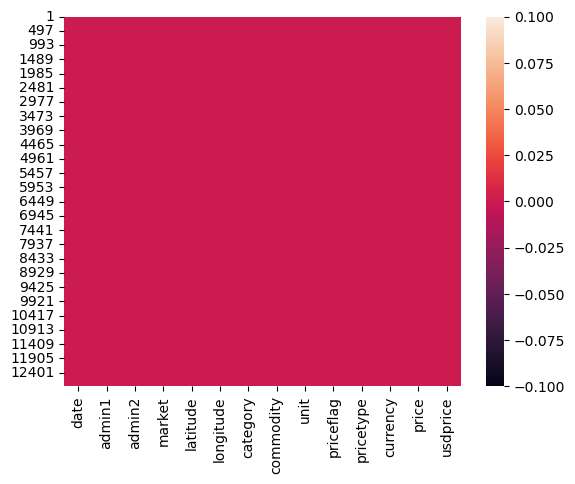

In [5]:
# Heat map to show visually show that there is no NaN value
sns.heatmap(df.isna())
plt.show()

#### 2.1(b) Renaming the columns 

In [6]:
# Renaming all columns
df = df.rename(columns={
                        'date': 'Date', 'admin1': 'Province', 'admin2': 'City', 'market': 'Market', 'latitude': 'Latitude', 
                        'longitude': 'Longitude', 'category': 'Category', 'commodity': 'Commodity', 'unit': 'Unit', 'priceflag': 'Priceflag',
                        'pricetype': 'Pricetype', 'currency': 'Currency', 'price': 'Price', 'usdprice': '$Price'
                       })

#### 2.1(c) Improved Version of Dataset 

In [7]:
# the improvised version of dataset 
df

Date            Province      City    Market   Latitude  \
1      2004-01-15         BALOCHISTAN    Quetta    Quetta  30.187222   
2      2004-01-15  KHYBER PAKHTUNKHWA  Peshawar  Peshawar  34.008366   
3      2004-01-15  KHYBER PAKHTUNKHWA  Peshawar  Peshawar  34.008366   
4      2004-01-15              PUNJAB    Lahore    Lahore  31.549722   
5      2004-01-15              PUNJAB    Lahore    Lahore  31.549722   
...           ...                 ...       ...       ...        ...   
12870  2024-01-15               SINDH   Karachi   Karachi    24.9056   
12871  2024-01-15               SINDH   Karachi   Karachi    24.9056   
12872  2024-01-15               SINDH   Karachi   Karachi    24.9056   
12873  2024-01-15               SINDH   Karachi   Karachi    24.9056   
12874  2024-01-15               SINDH   Karachi   Karachi    24.9056   

       Longitude            Category               Commodity Unit Priceflag  \
1        67.0125  cereals and tubers  Rice (basmati, broken)   KG    actual   
2      71.580182  cereals and tubers  Rice (basmati, broken)   KG    actual   
3      71.580182  cereals and tubers             Wheat flour   KG    actual   
4      74.343611  cereals and tubers  Rice (basmati, broken)   KG    actual   
5      74.343611  cereals and tubers             Wheat flour   KG    actual   
...          ...                 ...                     ...  ...       ...   
12870    67.0822        oil and fats       Ghee (artificial)   KG  forecast   
12871    67.0822        oil and fats           Oil (cooking)    L  forecast   
12872    67.0822     pulses and nuts             Beans(mash)   KG  forecast   
12873    67.0822     pulses and nuts         Lentils (masur)   KG  forecast   
12874    67.0822     pulses and nuts         Lentils (moong)   KG  forecast   

      Pricetype Currency  Price  $Price  
1        Retail      PKR   20.0  0.3487  
2        Retail      PKR  17.59  0.3066  
3        Retail      PKR   12.0  0.2092  
4        Retail      PKR  19.15  0.3339  
5        Retail      PKR  11.75  0.2049  
...         ...      ...    ...     ...  
12870    Retail      PKR    0.0     0.0  
12871    Retail      PKR    0.0     0.0  
12872    Retail      PKR    0.0     0.0  
12873    Retail      PKR    0.0     0.0  
12874    Retail      PKR    0.0     0.0  

[12874 rows x 14 columns]

#### 2.1(d)(i) Checking missing values

In [8]:
# Checking for missing values in columns
missing_columns = df.columns[df.isnull().any()]
if not missing_columns.empty:
    print("Missing values in columns:")
    print(df[missing_columns].isnull().sum())

# Checking for missing values in rows
missing_rows = df[df.isnull().any(axis=1)]
if not missing_rows.empty:
    print("\nRows with missing values:")
    print(missing_rows)

# Print a message if no missing values are found at all 
if missing_columns.empty and missing_rows.empty:
    print("\nNo missing values in either rows or columns.")


No missing values in either rows or columns.


#### 2.1(d)(ii) Verification via heatmap

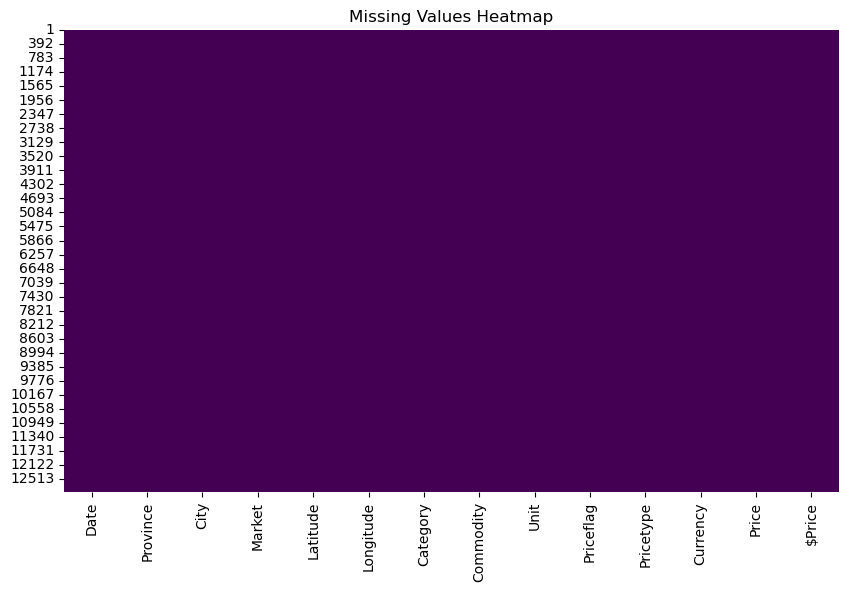

In [9]:
# setting the binary mask to True that represents non-missing values
no_missing_values = df.notnull()

# heatmap Verification
plt.figure(figsize=(10, 6))
sns.heatmap(no_missing_values, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

#### 2.2 Data Duplication

In [10]:
# Checking for duplicate rows
duplicate_rows = df[df.duplicated()]

# Print duplicate rows
if not duplicate_rows.empty:
    print("Duplicate rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found in the dataset.")

No duplicate rows found in the dataset.


### 3. Feature Extraction 

#### 3.1 Data Analysis

#### 3.1(a) Analyzing the strucutre of dataset

In [11]:
print("Shape", df.shape, "\n")
df.info()

Shape (12874, 14) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12874 entries, 1 to 12874
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       12874 non-null  object
 1   Province   12874 non-null  object
 2   City       12874 non-null  object
 3   Market     12874 non-null  object
 4   Latitude   12874 non-null  object
 5   Longitude  12874 non-null  object
 6   Category   12874 non-null  object
 7   Commodity  12874 non-null  object
 8   Unit       12874 non-null  object
 9   Priceflag  12874 non-null  object
 10  Pricetype  12874 non-null  object
 11  Currency   12874 non-null  object
 12  Price      12874 non-null  object
 13  $Price     12874 non-null  object
dtypes: object(14)
memory usage: 1.4+ MB


#### 3.1(b) Converting the following columns from objects to:
1. Date --> Data Time Object
2. Price --> integer 
3. $Price --> integer 

In [12]:
# Converting Date column from simple object to Date Time object
df["Date"] =  pd.to_datetime(df["Date"])

# converting Price from object to int
df['Price'] = df['Price'].astype(str).astype(float)

# converting the $Price from object to int
df['$Price'] = df['$Price'].astype(str).astype(float)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12874 entries, 1 to 12874
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       12874 non-null  datetime64[ns]
 1   Province   12874 non-null  object        
 2   City       12874 non-null  object        
 3   Market     12874 non-null  object        
 4   Latitude   12874 non-null  object        
 5   Longitude  12874 non-null  object        
 6   Category   12874 non-null  object        
 7   Commodity  12874 non-null  object        
 8   Unit       12874 non-null  object        
 9   Priceflag  12874 non-null  object        
 10  Pricetype  12874 non-null  object        
 11  Currency   12874 non-null  object        
 12  Price      12874 non-null  float64       
 13  $Price     12874 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(11)
memory usage: 1.4+ MB


#### 3.2 Data Sorting

In [14]:
# sorting the data as per the dates
df = df.sort_values(by='Date')

In [15]:
df

Date            Province      City    Market   Latitude  \
1     2004-01-15         BALOCHISTAN    Quetta    Quetta  30.187222   
2     2004-01-15  KHYBER PAKHTUNKHWA  Peshawar  Peshawar  34.008366   
3     2004-01-15  KHYBER PAKHTUNKHWA  Peshawar  Peshawar  34.008366   
4     2004-01-15              PUNJAB    Lahore    Lahore  31.549722   
5     2004-01-15              PUNJAB    Lahore    Lahore  31.549722   
...          ...                 ...       ...       ...        ...   
12820 2024-01-15  KHYBER PAKHTUNKHWA  Peshawar  Peshawar  34.008366   
12819 2024-01-15  KHYBER PAKHTUNKHWA  Peshawar  Peshawar  34.008366   
12818 2024-01-15  KHYBER PAKHTUNKHWA  Peshawar  Peshawar  34.008366   
12825 2024-01-15  KHYBER PAKHTUNKHWA  Peshawar  Peshawar  34.008366   
12874 2024-01-15               SINDH   Karachi   Karachi    24.9056   

       Longitude             Category               Commodity   Unit  \
1        67.0125   cereals and tubers  Rice (basmati, broken)     KG   
2      71.580182   cereals and tubers  Rice (basmati, broken)     KG   
3      71.580182   cereals and tubers             Wheat flour     KG   
4      74.343611   cereals and tubers  Rice (basmati, broken)     KG   
5      74.343611   cereals and tubers             Wheat flour     KG   
...          ...                  ...                     ...    ...   
12820  71.580182       milk and dairy                    Milk      L   
12819  71.580182  meat, fish and eggs                 Poultry     KG   
12818  71.580182  meat, fish and eggs                    Eggs  Dozen   
12825  71.580182         oil and fats       Ghee (artificial)     KG   
12874    67.0822      pulses and nuts         Lentils (moong)     KG   

      Priceflag Pricetype Currency  Price  $Price  
1        actual    Retail      PKR  20.00  0.3487  
2        actual    Retail      PKR  17.59  0.3066  
3        actual    Retail      PKR  12.00  0.2092  
4        actual    Retail      PKR  19.15  0.3339  
5        actual    Retail      PKR  11.75  0.2049  
...         ...       ...      ...    ...     ...  
12820  forecast    Retail      PKR   0.00  0.0000  
12819  forecast    Retail      PKR   0.00  0.0000  
12818  forecast    Retail      PKR   0.00  0.0000  
12825  forecast    Retail      PKR   0.00  0.0000  
12874  forecast    Retail      PKR   0.00  0.0000  

[12874 rows x 14 columns]

#### 3.3 Visualising the trends 

##### Commodities vs Price (both in PKR and $)

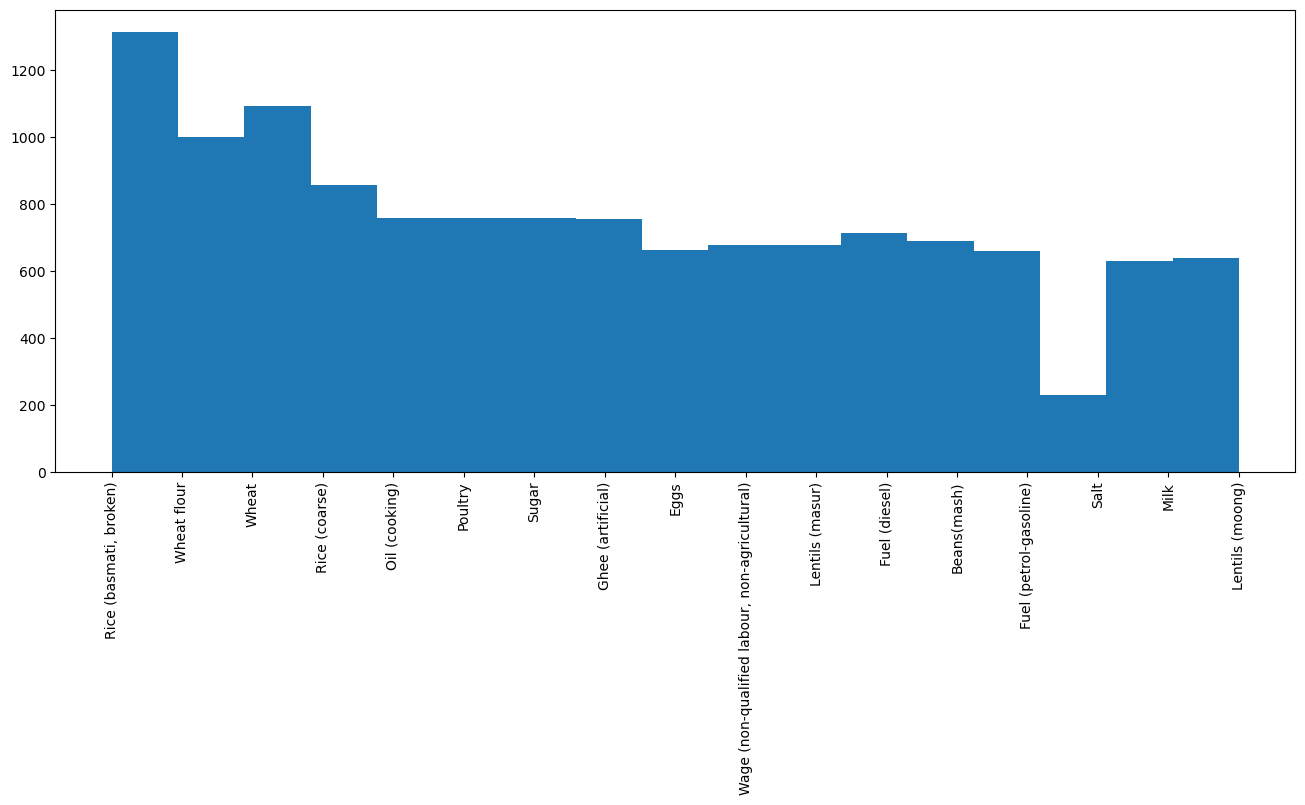

In [16]:
fig, ax = plt.subplots(figsize=(16, 6))
plt.hist(x='Commodity', data = df, bins = 17)
plt.xticks(rotation = 90)
plt.show()

C:\Users\muham\AppData\Local\Temp\ipykernel_16864\661987880.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


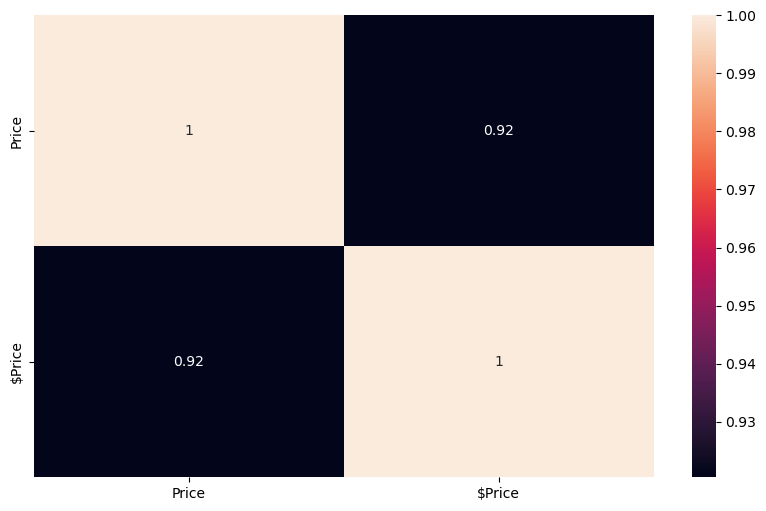

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(df.corr(), annot = True)
plt.show()

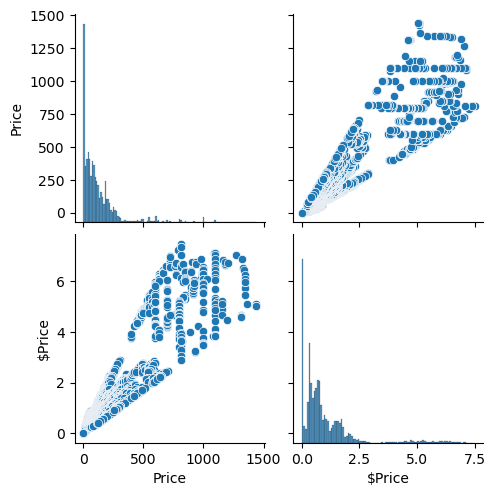

In [18]:
sns.pairplot(df)
plt.show()

##### Category/Commodity vs Market vs Price

In [19]:
df['Category'].unique()

array(['cereals and tubers', 'oil and fats', 'meat, fish and eggs',
       'miscellaneous food', 'non-food', 'pulses and nuts',
       'milk and dairy'], dtype=object)

In [20]:
cols = df[["Province", "City", "Market","Category", "Commodity", "Unit"]]

for i in cols.columns:
    print("\n", df[i].unique())   


 ['BALOCHISTAN' 'KHYBER PAKHTUNKHWA' 'PUNJAB' 'SINDH']

 ['Quetta' 'Peshawar' 'Lahore' 'Multan' 'Karachi']

 ['Quetta' 'Peshawar' 'Lahore' 'Multan' 'Karachi']

 ['cereals and tubers' 'oil and fats' 'meat, fish and eggs'
 'miscellaneous food' 'non-food' 'pulses and nuts' 'milk and dairy']

 ['Rice (basmati, broken)' 'Wheat flour' 'Wheat' 'Rice (coarse)'
 'Oil (cooking)' 'Poultry' 'Sugar' 'Ghee (artificial)' 'Eggs'
 'Wage (non-qualified labour, non-agricultural)' 'Lentils (masur)'
 'Fuel (diesel)' 'Beans(mash)' 'Fuel (petrol-gasoline)' 'Salt' 'Milk'
 'Lentils (moong)']

 ['KG' 'L' 'Dozen' 'Day']


In [21]:
import plotly.graph_objects as go 

cat_counts = df['Category'].value_counts()
fig = go.Figure(data=[go.Bar(x=cat_counts.index, y=cat_counts.values)])
fig.update_layout(title='Distribution of Food Categories', xaxis_title='Categories', yaxis_title='Count')
fig.show()

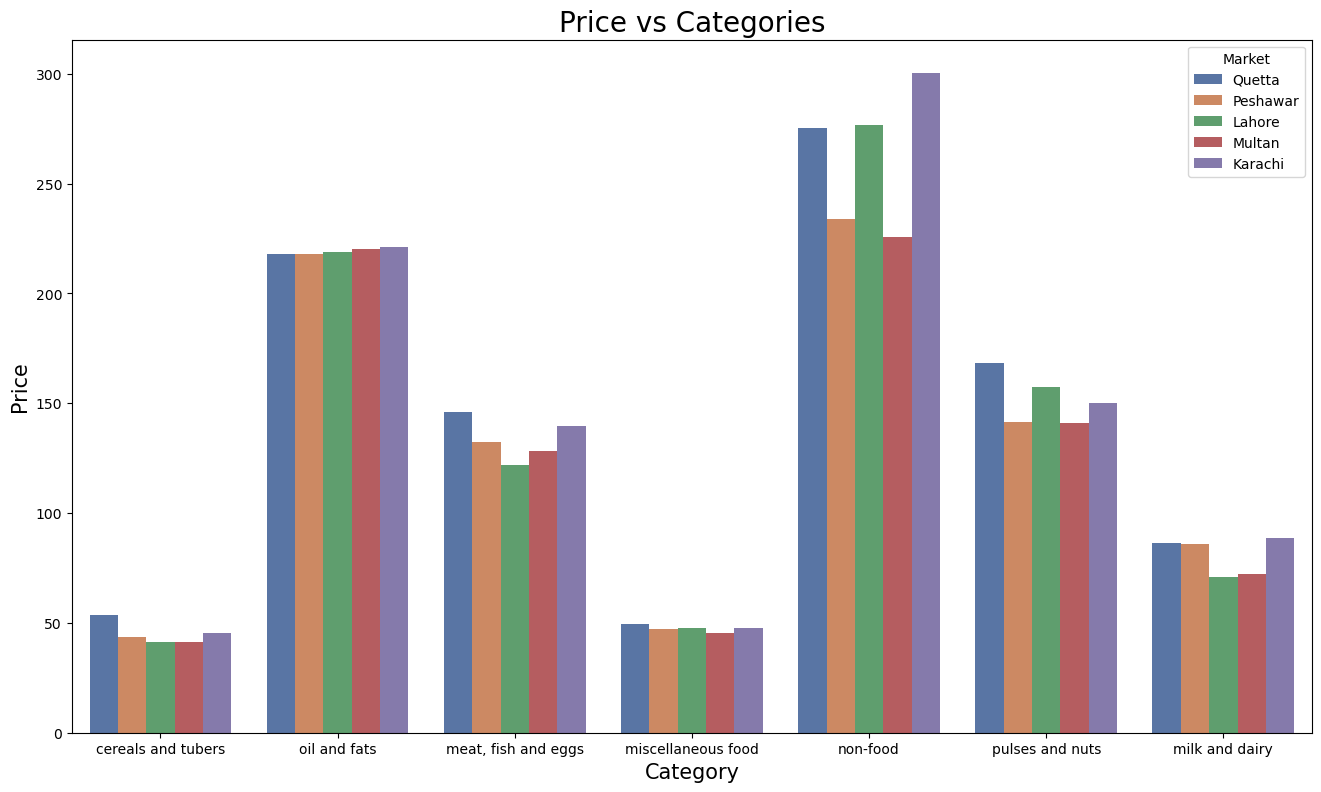

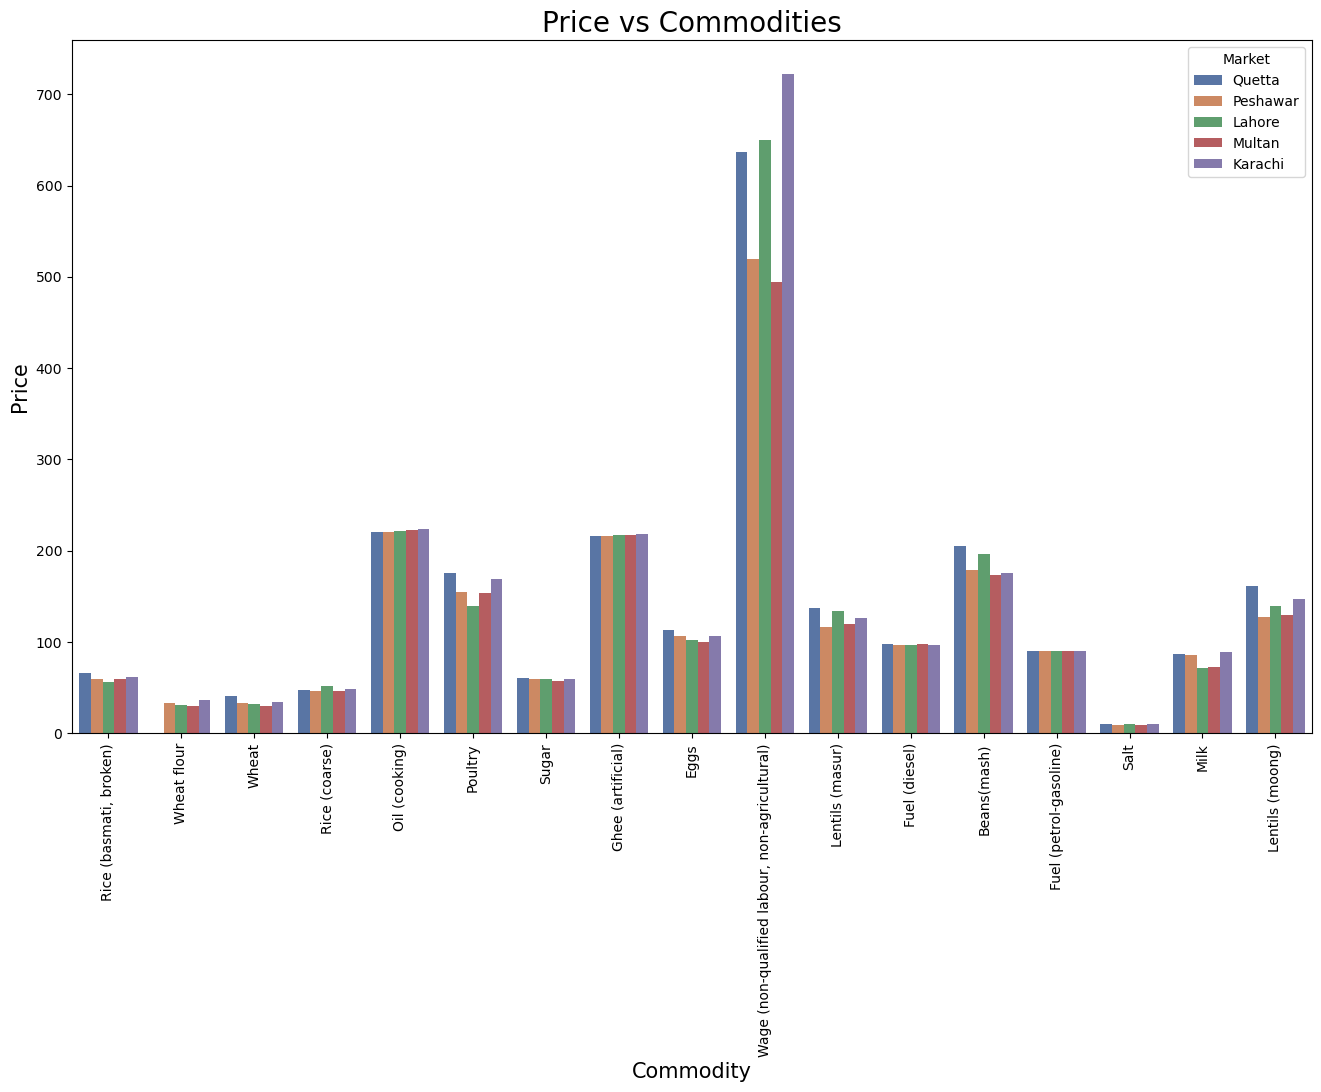

In [22]:
fig = plt.subplots(figsize=(16, 9))
sns.barplot(x=df["Category"], y=df["Price"], hue=df["Market"],palette="deep", errorbar=('ci', 0))
plt.xticks(rotation=0);
plt.xlabel("Category", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Price vs Categories", fontsize=20)
plt.show()

fig = plt.subplots(figsize=(16, 9))
sns.barplot(x=df["Commodity"], y=df["Price"], hue=df["Market"],palette="deep", errorbar=('ci', 0))
plt.xticks(rotation=90);
plt.xlabel("Commodity", fontsize=15)
plt.ylabel("Price", fontsize=15)
plt.title("Price vs Commodities", fontsize=20)
plt.show()

In [23]:
fc = pd.pivot_table(df, index = 'Date', columns = ['Commodity'], values=["Price"])
fc.head()

Price                                            \
Commodity  Beans(mash) Eggs Fuel (diesel) Fuel (petrol-gasoline)   
Date                                                               
2004-01-15         NaN  NaN           NaN                    NaN   
2004-02-15         NaN  NaN           NaN                    NaN   
2004-03-15         NaN  NaN           NaN                    NaN   
2004-04-15         NaN  NaN           NaN                    NaN   
2004-05-15         NaN  NaN           NaN                    NaN   

                                                                   \
Commodity  Ghee (artificial) Lentils (masur) Lentils (moong) Milk   
Date                                                                
2004-01-15               NaN             NaN             NaN  NaN   
2004-02-15               NaN             NaN             NaN  NaN   
2004-03-15               NaN             NaN             NaN  NaN   
2004-04-15               NaN             NaN             NaN  NaN   
2004-05-15               NaN             NaN             NaN  NaN   

                                                                            \
Commodity  Oil (cooking) Poultry Rice (basmati, broken) Rice (coarse) Salt   
Date                                                                         
2004-01-15           NaN     NaN                 18.872           NaN  NaN   
2004-02-15           NaN     NaN                 18.754           NaN  NaN   
2004-03-15           NaN     NaN                 18.818           NaN  NaN   
2004-04-15           NaN     NaN                 19.150           NaN  NaN   
2004-05-15           NaN     NaN                 19.182           NaN  NaN   

                                                                      \
Commodity  Sugar Wage (non-qualified labour, non-agricultural) Wheat   
Date                                                                   
2004-01-15   NaN                                           NaN   NaN   
2004-02-15   NaN                                           NaN   NaN   
2004-03-15   NaN                                           NaN   NaN   
2004-04-15   NaN                                           NaN   NaN   
2004-05-15   NaN                                           NaN   NaN   

                        
Commodity  Wheat flour  
Date                    
2004-01-15     12.4400  
2004-02-15     12.7550  
2004-03-15     13.0475  
2004-04-15     12.2125  
2004-05-15     12.7700

In [24]:
print(fc.shape, "\n")
print(fc.info())

(241, 17) 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 241 entries, 2004-01-15 to 2024-01-15
Data columns (total 17 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   (Price, Beans(mash))                                    116 non-null    float64
 1   (Price, Eggs)                                           113 non-null    float64
 2   (Price, Fuel (diesel))                                  121 non-null    float64
 3   (Price, Fuel (petrol-gasoline))                         110 non-null    float64
 4   (Price, Ghee (artificial))                              129 non-null    float64
 5   (Price, Lentils (masur))                                116 non-null    float64
 6   (Price, Lentils (moong))                                106 non-null    float64
 7   (Price, Milk)                                           104 non-null    float64
 8   (Price, O

In [25]:
fc.isnull().sum()

       Commodity                                    
Price  Beans(mash)                                      125
       Eggs                                             128
       Fuel (diesel)                                    120
       Fuel (petrol-gasoline)                           131
       Ghee (artificial)                                112
       Lentils (masur)                                  125
       Lentils (moong)                                  135
       Milk                                             137
       Oil (cooking)                                    110
       Poultry                                          110
       Rice (basmati, broken)                             0
       Rice (coarse)                                     24
       Salt                                             194
       Sugar                                            110
       Wage (non-qualified labour, non-agricultural)    125
       Wheat                                   

In [26]:
fc.describe()

Price                                                   \
Commodity Beans(mash)        Eggs Fuel (diesel) Fuel (petrol-gasoline)   
count      116.000000  113.000000    121.000000             110.000000   
mean       187.053078  105.093637     95.510331              86.974373   
std         62.048861   35.515150     29.658949              29.116193   
min          0.000000    0.000000      0.000000               0.000000   
25%        152.828500   91.100000     80.270000              73.009000   
50%        187.432000  101.332000    102.812000              85.724000   
75%        239.779000  123.772000    115.868000             109.888000   
max        279.332000  199.754000    146.861000             138.843000   

                                                                         \
Commodity Ghee (artificial) Lentils (masur) Lentils (moong)        Milk   
count            129.000000      116.000000      106.000000  104.000000   
mean             209.330767      126.117431      146.583358   82.460625   
std               63.652138       34.869542       59.691214   24.370306   
min                0.000000        0.000000        0.000000    0.000000   
25%              183.520000      111.381000      120.117500   80.481000   
50%              202.435000      135.016000      141.019000   83.942000   
75%              252.878000      146.457750      171.813000   93.624000   
max              351.086000      179.122000      285.946000  115.610000   

                                                                          \
Commodity Oil (cooking)     Poultry Rice (basmati, broken) Rice (coarse)   
count        131.000000  131.000000              241.00000    217.000000   
mean         213.922672  157.864771               59.56332     46.347904   
std           63.855262   47.908311               26.22326     17.924969   
min            0.000000    0.000000                0.00000      0.000000   
25%          186.800000  137.628000               45.39600     39.335000   
50%          211.440000  158.632000               64.88600     45.833333   
75%          251.865000  184.032000               79.83200     53.830000   
max          345.666000  309.528000              118.16100    105.965000   

                                  \
Commodity       Salt       Sugar   
count      47.000000  131.000000   
mean        9.257872   60.567298   
std         3.619789   20.205221   
min         0.000000    0.000000   
25%        10.200000   53.266000   
50%        10.400000   57.274000   
75%        10.400000   69.506500   
max        12.550000  108.688000   

                                                                                
Commodity Wage (non-qualified labour, non-agricultural)      Wheat Wheat flour  
count                                        116.000000  217.00000  241.000000  
mean                                         618.873207   31.42253   31.850389  
std                                          201.874088   12.59006   13.284752  
min                                            0.000000    0.00000    0.000000  
25%                                          542.800000   25.21250   24.502500  
50%                                          562.600000   33.10600   32.215000  
75%                                          779.422500   35.75000   40.153333  
max                                          945.000000   63.08700   68.541250

In [27]:
print("\n", "Maximum Prices",fc.max(), "\n")
print("Minimum Prices",fc.min(), "\n")


 Maximum Prices        Commodity                                    
Price  Beans(mash)                                      279.33200
       Eggs                                             199.75400
       Fuel (diesel)                                    146.86100
       Fuel (petrol-gasoline)                           138.84300
       Ghee (artificial)                                351.08600
       Lentils (masur)                                  179.12200
       Lentils (moong)                                  285.94600
       Milk                                             115.61000
       Oil (cooking)                                    345.66600
       Poultry                                          309.52800
       Rice (basmati, broken)                           118.16100
       Rice (coarse)                                    105.96500
       Salt                                              12.55000
       Sugar                                            108.68800
      

In [28]:
fc_cor = fc.corr()
fc_cor

Price            \
Commodity                                           Beans(mash)      Eggs   
      Commodity                                                             
Price Beans(mash)                                      1.000000  0.720333   
      Eggs                                             0.720333  1.000000   
      Fuel (diesel)                                    0.524459  0.753813   
      Fuel (petrol-gasoline)                           0.606823  0.786826   
      Ghee (artificial)                                0.704913  0.832458   
      Lentils (masur)                                  0.926175  0.760169   
      Lentils (moong)                                  0.832862  0.701343   
      Milk                                             0.832566  0.864542   
      Oil (cooking)                                    0.700468  0.827692   
      Poultry                                          0.697163  0.769558   
      Rice (basmati, broken)                           0.698848  0.826763   
      Rice (coarse)                                    0.724931  0.819231   
      Salt                                             0.410464  0.016222   
      Sugar                                            0.840697  0.786553   
      Wage (non-qualified labour, non-agricultural)    0.708289  0.792344   
      Wheat                                            0.775942  0.900827   
      Wheat flour                                      0.794959  0.858416   

                                                                   \
Commodity                                           Fuel (diesel)   
      Commodity                                                     
Price Beans(mash)                                        0.524459   
      Eggs                                               0.753813   
      Fuel (diesel)                                      1.000000   
      Fuel (petrol-gasoline)                             0.984055   
      Ghee (artificial)                                  0.825239   
      Lentils (masur)                                    0.693062   
      Lentils (moong)                                    0.600545   
      Milk                                               0.801715   
      Oil (cooking)                                      0.848090   
      Poultry                                            0.754782   
      Rice (basmati, broken)                             0.876790   
      Rice (coarse)                                      0.837749   
      Salt                                              -0.728726   
      Sugar                                              0.598492   
      Wage (non-qualified labour, non-agricultural)      0.742519   
      Wheat                                              0.816846   
      Wheat flour                                        0.810983   

                                                                            \
Commodity                                           Fuel (petrol-gasoline)   
      Commodity                                                              
Price Beans(mash)                                                 0.606823   
      Eggs                                                        0.786826   
      Fuel (diesel)                                               0.984055   
      Fuel (petrol-gasoline)                                      1.000000   
      Ghee (artificial)                                           0.906084   
      Lentils (masur)                                             0.712234   
      Lentils (moong)                                             0.611072   
      Milk                                                        0.792405   
      Oil (cooking)                                               0.920278   
      Poultry                                                     0.774829   
      Rice (basmati, broken)                                      0.877180   
      Rice (coarse)                         

<Axes: xlabel='None-Commodity', ylabel='None-Commodity'>

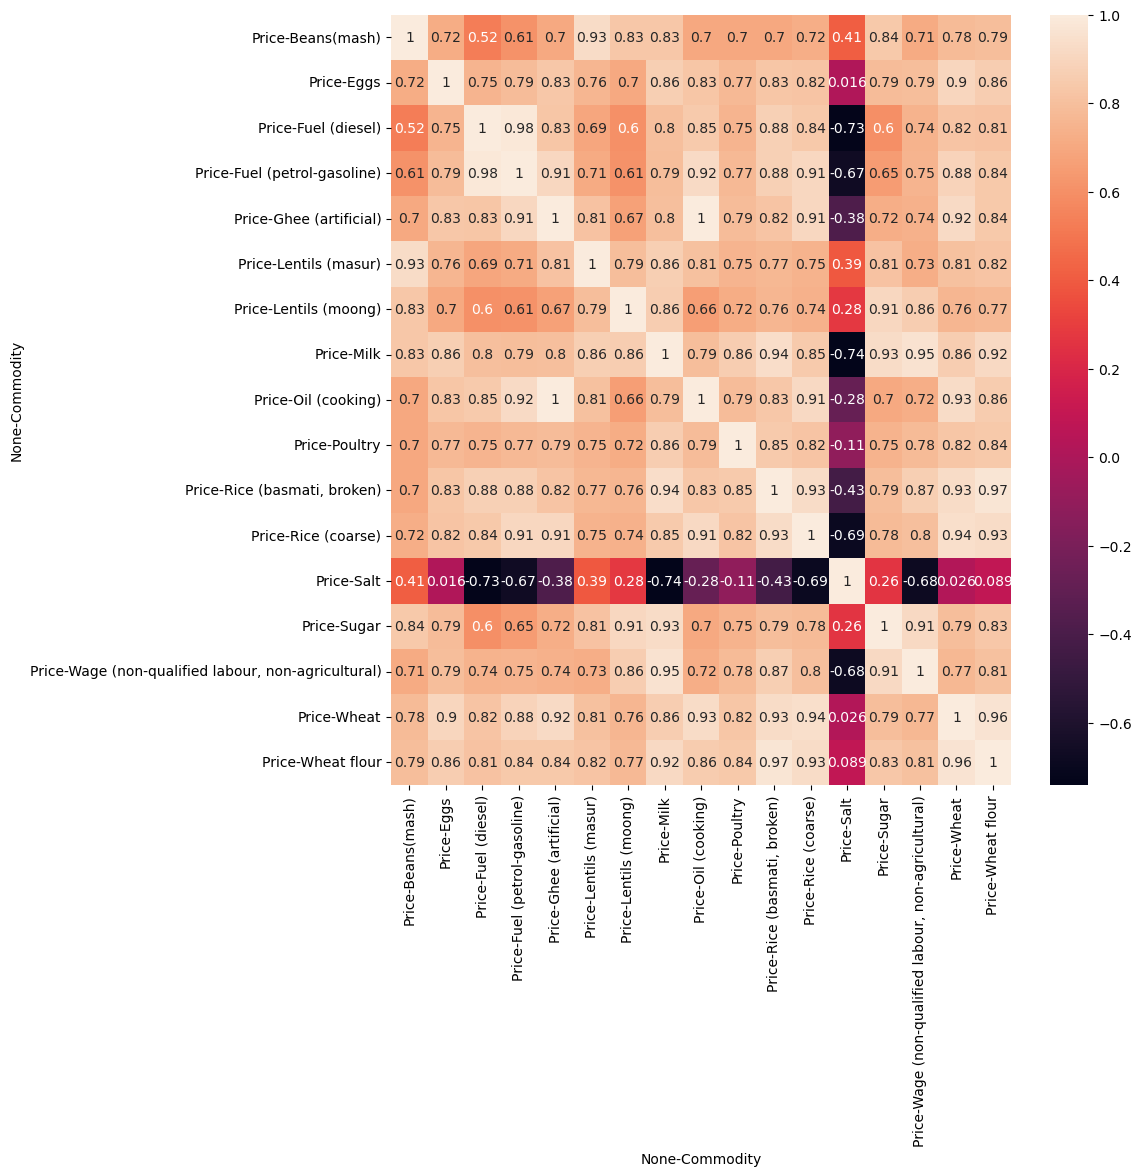

In [29]:
fig = plt.subplots(figsize=(10,10))
sns.heatmap(fc_cor, annot=True)

In [30]:
def food_wrangle():
    food_df = df[~df["Category"].str.contains("non-food", regex=True)]
    print("Shape", food_df.shape, "\n")
    print(food_df.info())
    return food_df
food_df = food_wrangle()
food_df.head()

Shape (10821, 14) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10821 entries, 1 to 12874
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10821 non-null  datetime64[ns]
 1   Province   10821 non-null  object        
 2   City       10821 non-null  object        
 3   Market     10821 non-null  object        
 4   Latitude   10821 non-null  object        
 5   Longitude  10821 non-null  object        
 6   Category   10821 non-null  object        
 7   Commodity  10821 non-null  object        
 8   Unit       10821 non-null  object        
 9   Priceflag  10821 non-null  object        
 10  Pricetype  10821 non-null  object        
 11  Currency   10821 non-null  object        
 12  Price      10821 non-null  float64       
 13  $Price     10821 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(11)
memory usage: 1.2+ MB
None


Date            Province      City    Market   Latitude  Longitude  \
1 2004-01-15         BALOCHISTAN    Quetta    Quetta  30.187222    67.0125   
2 2004-01-15  KHYBER PAKHTUNKHWA  Peshawar  Peshawar  34.008366  71.580182   
3 2004-01-15  KHYBER PAKHTUNKHWA  Peshawar  Peshawar  34.008366  71.580182   
4 2004-01-15              PUNJAB    Lahore    Lahore  31.549722  74.343611   
5 2004-01-15              PUNJAB    Lahore    Lahore  31.549722  74.343611   

             Category               Commodity Unit Priceflag Pricetype  \
1  cereals and tubers  Rice (basmati, broken)   KG    actual    Retail   
2  cereals and tubers  Rice (basmati, broken)   KG    actual    Retail   
3  cereals and tubers             Wheat flour   KG    actual    Retail   
4  cereals and tubers  Rice (basmati, broken)   KG    actual    Retail   
5  cereals and tubers             Wheat flour   KG    actual    Retail   

  Currency  Price  $Price  
1      PKR  20.00  0.3487  
2      PKR  17.59  0.3066  
3      PKR  12.00  0.2092  
4      PKR  19.15  0.3339  
5      PKR  11.75  0.2049

In [32]:
food = food_df[["Province", "City", "Market","Category", 
                        "Commodity", "Unit"]]

for i in food.columns:
    print("\n", food[i].unique())   


 ['BALOCHISTAN' 'KHYBER PAKHTUNKHWA' 'PUNJAB' 'SINDH']

 ['Quetta' 'Peshawar' 'Lahore' 'Multan' 'Karachi']

 ['Quetta' 'Peshawar' 'Lahore' 'Multan' 'Karachi']

 ['cereals and tubers' 'oil and fats' 'meat, fish and eggs'
 'miscellaneous food' 'pulses and nuts' 'milk and dairy']

 ['Rice (basmati, broken)' 'Wheat flour' 'Wheat' 'Rice (coarse)'
 'Oil (cooking)' 'Poultry' 'Sugar' 'Ghee (artificial)' 'Eggs'
 'Lentils (masur)' 'Beans(mash)' 'Salt' 'Milk' 'Lentils (moong)']

 ['KG' 'L' 'Dozen']


In [33]:
def msc_food_wrangle():
    msc_food_df = food_df[food_df["Category"].str.contains("miscellaneous food", regex=True)]
    print("Shape", msc_food_df.shape, "\n")
    print(msc_food_df.info())
    return msc_food_df
msc_food_df = msc_food_wrangle()
msc_food_df.head()

Shape (986, 14) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 1632 to 12821
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       986 non-null    datetime64[ns]
 1   Province   986 non-null    object        
 2   City       986 non-null    object        
 3   Market     986 non-null    object        
 4   Latitude   986 non-null    object        
 5   Longitude  986 non-null    object        
 6   Category   986 non-null    object        
 7   Commodity  986 non-null    object        
 8   Unit       986 non-null    object        
 9   Priceflag  986 non-null    object        
 10  Pricetype  986 non-null    object        
 11  Currency   986 non-null    object        
 12  Price      986 non-null    float64       
 13  $Price     986 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(11)
memory usage: 115.5+ KB
None


Date            Province      City    Market   Latitude  Longitude  \
1632 2013-01-15              PUNJAB    Multan    Multan  30.195556  71.475278   
1640 2013-01-15               SINDH   Karachi   Karachi    24.9056    67.0822   
1625 2013-01-15              PUNJAB    Lahore    Lahore  31.549722  74.343611   
1609 2013-01-15         BALOCHISTAN    Quetta    Quetta  30.187222    67.0125   
1617 2013-01-15  KHYBER PAKHTUNKHWA  Peshawar  Peshawar  34.008366  71.580182   

                Category Commodity Unit Priceflag Pricetype Currency  Price  \
1632  miscellaneous food     Sugar   KG    actual    Retail      PKR  51.30   
1640  miscellaneous food     Sugar   KG    actual    Retail      PKR  53.63   
1625  miscellaneous food     Sugar   KG    actual    Retail      PKR  52.75   
1609  miscellaneous food     Sugar   KG    actual    Retail      PKR  52.80   
1617  miscellaneous food     Sugar   KG    actual    Retail      PKR  53.80   

      $Price  
1632  0.5275  
1640  0.5515  
1625  0.5424  
1609  0.5429  
1617  0.5532

In [34]:
msc_food = msc_food_df[["Province", "City", "Market","Category", 
                        "Commodity", "Unit"]]

for i in food.columns:
    print("\n", msc_food[i].unique())    


 ['PUNJAB' 'SINDH' 'BALOCHISTAN' 'KHYBER PAKHTUNKHWA']

 ['Multan' 'Karachi' 'Lahore' 'Quetta' 'Peshawar']

 ['Multan' 'Karachi' 'Lahore' 'Quetta' 'Peshawar']

 ['miscellaneous food']

 ['Sugar' 'Salt']

 ['KG']


In [36]:
def sugar_food_wrangle():
    sugar_food_df = msc_food_df[msc_food_df["Commodity"].str.contains("Sugar", regex=True)]
    print("Shape", sugar_food_df.shape, "\n")
    print(sugar_food_df.info())
    return sugar_food_df
sugar_food_df = sugar_food_wrangle()
sugar_food_df.head()

Shape (757, 14) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 757 entries, 1632 to 12821
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       757 non-null    datetime64[ns]
 1   Province   757 non-null    object        
 2   City       757 non-null    object        
 3   Market     757 non-null    object        
 4   Latitude   757 non-null    object        
 5   Longitude  757 non-null    object        
 6   Category   757 non-null    object        
 7   Commodity  757 non-null    object        
 8   Unit       757 non-null    object        
 9   Priceflag  757 non-null    object        
 10  Pricetype  757 non-null    object        
 11  Currency   757 non-null    object        
 12  Price      757 non-null    float64       
 13  $Price     757 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(11)
memory usage: 88.7+ KB
None


Date            Province      City    Market   Latitude  Longitude  \
1632 2013-01-15              PUNJAB    Multan    Multan  30.195556  71.475278   
1640 2013-01-15               SINDH   Karachi   Karachi    24.9056    67.0822   
1625 2013-01-15              PUNJAB    Lahore    Lahore  31.549722  74.343611   
1609 2013-01-15         BALOCHISTAN    Quetta    Quetta  30.187222    67.0125   
1617 2013-01-15  KHYBER PAKHTUNKHWA  Peshawar  Peshawar  34.008366  71.580182   

                Category Commodity Unit Priceflag Pricetype Currency  Price  \
1632  miscellaneous food     Sugar   KG    actual    Retail      PKR  51.30   
1640  miscellaneous food     Sugar   KG    actual    Retail      PKR  53.63   
1625  miscellaneous food     Sugar   KG    actual    Retail      PKR  52.75   
1609  miscellaneous food     Sugar   KG    actual    Retail      PKR  52.80   
1617  miscellaneous food     Sugar   KG    actual    Retail      PKR  53.80   

      $Price  
1632  0.5275  
1640  0.5515  
1625  0.5424  
1609  0.5429  
1617  0.5532

In [37]:
print(sugar_food_df["Price"].min())
print(sugar_food_df["Price"].max())

0.0
145.58


In [38]:
sugar_food_df["Price"].sort_values().tail()

10701    136.55
10685    139.67
10670    142.39
10717    142.56
10654    145.58
Name: Price, dtype: float64

In [39]:
sugar_food = sugar_food_df[["Province", "City", "Market","Category", 
                        "Commodity", "Unit"]]

for i in sugar_food.columns:
    print("\n", sugar_food[i].unique())    


 ['PUNJAB' 'SINDH' 'BALOCHISTAN' 'KHYBER PAKHTUNKHWA']

 ['Multan' 'Karachi' 'Lahore' 'Quetta' 'Peshawar']

 ['Multan' 'Karachi' 'Lahore' 'Quetta' 'Peshawar']

 ['miscellaneous food']

 ['Sugar']

 ['KG']


In [40]:
def non_food_wrangle():
    non_food_df = df[df["Category"].str.contains("non-food", regex=True)]
    non_food_df.drop(["Latitude", "Longitude"], axis=1, inplace=True)
    print("Shape", non_food_df.shape, "\n")
    print(non_food_df.info())
    return non_food_df
non_food_df = non_food_wrangle()
non_food_df.head()

Shape (2053, 12) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2053 entries, 1886 to 12822
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2053 non-null   datetime64[ns]
 1   Province   2053 non-null   object        
 2   City       2053 non-null   object        
 3   Market     2053 non-null   object        
 4   Category   2053 non-null   object        
 5   Commodity  2053 non-null   object        
 6   Unit       2053 non-null   object        
 7   Priceflag  2053 non-null   object        
 8   Pricetype  2053 non-null   object        
 9   Currency   2053 non-null   object        
 10  Price      2053 non-null   float64       
 11  $Price     2053 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(9)
memory usage: 208.5+ KB
None


C:\Users\muham\AppData\Local\Temp\ipykernel_16864\45952774.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Date     Province    City  Market  Category  \
1886 2013-09-15  BALOCHISTAN  Quetta  Quetta  non-food   
1924 2013-10-15  BALOCHISTAN  Quetta  Quetta  non-food   
1946 2013-11-15  BALOCHISTAN  Quetta  Quetta  non-food   
2022 2014-01-15       PUNJAB  Multan  Multan  non-food   
2021 2014-01-15       PUNJAB  Multan  Multan  non-food   

                                          Commodity Unit Priceflag Pricetype  \
1886  Wage (non-qualified labour, non-agricultural)  Day    actual    Retail   
1924  Wage (non-qualified labour, non-agricultural)  Day    actual    Retail   
1946  Wage (non-qualified labour, non-agricultural)  Day    actual    Retail   
2022  Wage (non-qualified labour, non-agricultural)  Day    actual    Retail   
2021                                  Fuel (diesel)    L    actual    Retail   

     Currency  Price  $Price  
1886      PKR  550.0  5.2240  
1924      PKR  550.0  5.2356  
1946      PKR  550.0  5.1804  
2022      PKR  400.0  3.7807  
2021      PKR  119.2  1.1267

In [41]:
non_food = non_food_df[["Province", "City", "Market","Category", 
                        "Commodity", "Unit"]]

for i in non_food.columns:
    print("\n", non_food[i].unique())    


 ['BALOCHISTAN' 'PUNJAB' 'SINDH' 'KHYBER PAKHTUNKHWA']

 ['Quetta' 'Multan' 'Karachi' 'Lahore' 'Peshawar']

 ['Quetta' 'Multan' 'Karachi' 'Lahore' 'Peshawar']

 ['non-food']

 ['Wage (non-qualified labour, non-agricultural)' 'Fuel (diesel)'
 'Fuel (petrol-gasoline)']

 ['Day' 'L']


In [42]:
nf = pd.pivot_table(non_food_df, index = 'Date', columns = ['Commodity'], values=["Price"])

In [43]:
nf.head()

Price                         \
Commodity  Fuel (diesel) Fuel (petrol-gasoline)   
Date                                              
2013-09-15           NaN                    NaN   
2013-10-15           NaN                    NaN   
2013-11-15           NaN                    NaN   
2014-01-15       117.522                    NaN   
2014-02-15       117.522                    NaN   

                                                          
Commodity  Wage (non-qualified labour, non-agricultural)  
Date                                                      
2013-09-15                                         550.0  
2013-10-15                                         550.0  
2013-11-15                                         550.0  
2014-01-15                                         484.6  
2014-02-15                                         489.6

In [44]:
print(nf.shape, "\n")
print(nf.info())

(124, 3) 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124 entries, 2013-09-15 to 2024-01-15
Data columns (total 3 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   (Price, Fuel (diesel))                                  121 non-null    float64
 1   (Price, Fuel (petrol-gasoline))                         110 non-null    float64
 2   (Price, Wage (non-qualified labour, non-agricultural))  116 non-null    float64
dtypes: float64(3)
memory usage: 3.9 KB
None


In [45]:
nf.isnull().sum()

       Commodity                                    
Price  Fuel (diesel)                                     3
       Fuel (petrol-gasoline)                           14
       Wage (non-qualified labour, non-agricultural)     8
dtype: int64

In [46]:
nf.dropna(inplace=True)

In [47]:
nf.isnull().sum()

       Commodity                                    
Price  Fuel (diesel)                                    0
       Fuel (petrol-gasoline)                           0
       Wage (non-qualified labour, non-agricultural)    0
dtype: int64

In [48]:
nf.shape

(110, 3)

In [49]:
print("\n", "Maximum Prices",nf.max(), "\n")
print("Minimum Prices",nf.min(), "\n")


 Maximum Prices        Commodity                                    
Price  Fuel (diesel)                                    146.861
       Fuel (petrol-gasoline)                           138.843
       Wage (non-qualified labour, non-agricultural)    945.000
dtype: float64 

Minimum Prices        Commodity                                    
Price  Fuel (diesel)                                    0.0
       Fuel (petrol-gasoline)                           0.0
       Wage (non-qualified labour, non-agricultural)    0.0
dtype: float64 



In [50]:
nf.describe()

Price                         \
Commodity Fuel (diesel) Fuel (petrol-gasoline)   
count        110.000000             110.000000   
mean          93.911236              86.974373   
std           30.623927              29.116193   
min            0.000000               0.000000   
25%           78.637500              73.009000   
50%           96.610000              85.724000   
75%          115.778250             109.888000   
max          146.861000             138.843000   

                                                         
Commodity Wage (non-qualified labour, non-agricultural)  
count                                        110.000000  
mean                                         624.322655  
std                                          205.824865  
min                                            0.000000  
25%                                          542.800000  
50%                                          566.800000  
75%                                          787.110000  
max                                          945.000000

In [51]:
cor1 = nf.corr()
cor1

Price  \
Commodity                                           Fuel (diesel)   
      Commodity                                                     
Price Fuel (diesel)                                      1.000000   
      Fuel (petrol-gasoline)                             0.984055   
      Wage (non-qualified labour, non-agricultural)      0.766487   

                                                                            \
Commodity                                           Fuel (petrol-gasoline)   
      Commodity                                                              
Price Fuel (diesel)                                               0.984055   
      Fuel (petrol-gasoline)                                      1.000000   
      Wage (non-qualified labour, non-agricultural)               0.754988   

                                                                                                   
Commodity                                           Wage (non-qualified labour, non-agricultural)  
      Commodity                                                                                    
Price Fuel (diesel)                                                                      0.766487  
      Fuel (petrol-gasoline)                                                             0.754988  
      Wage (non-qualified labour, non-agricultural)                                      1.000000

<Axes: xlabel='None-Commodity', ylabel='None-Commodity'>

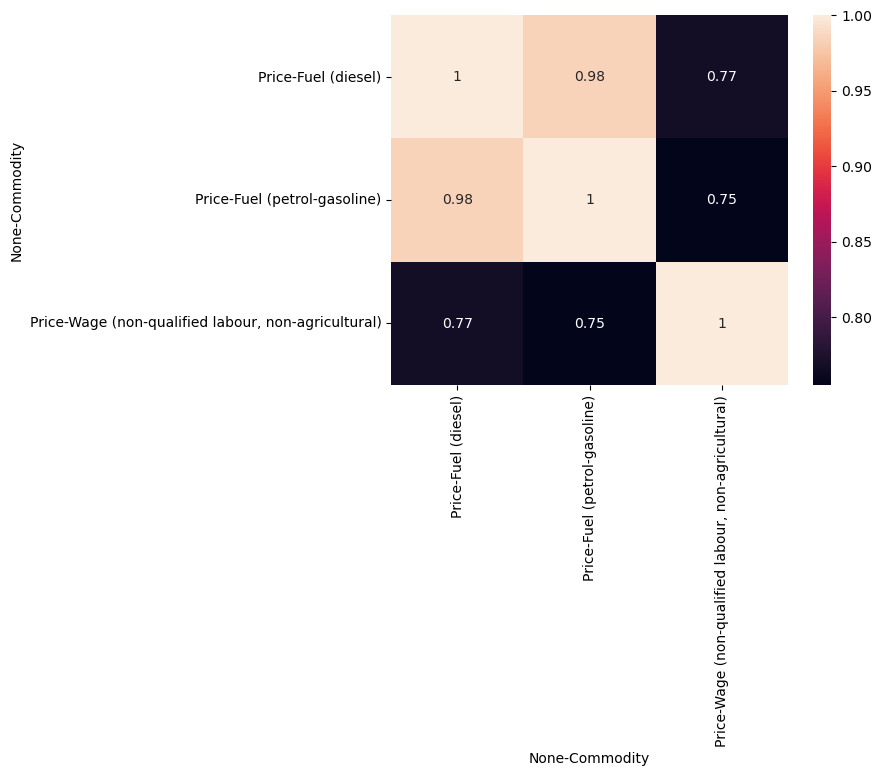

In [52]:
sns.heatmap(cor1, annot=True)

##### Food Prices in PKR (2004-2023)

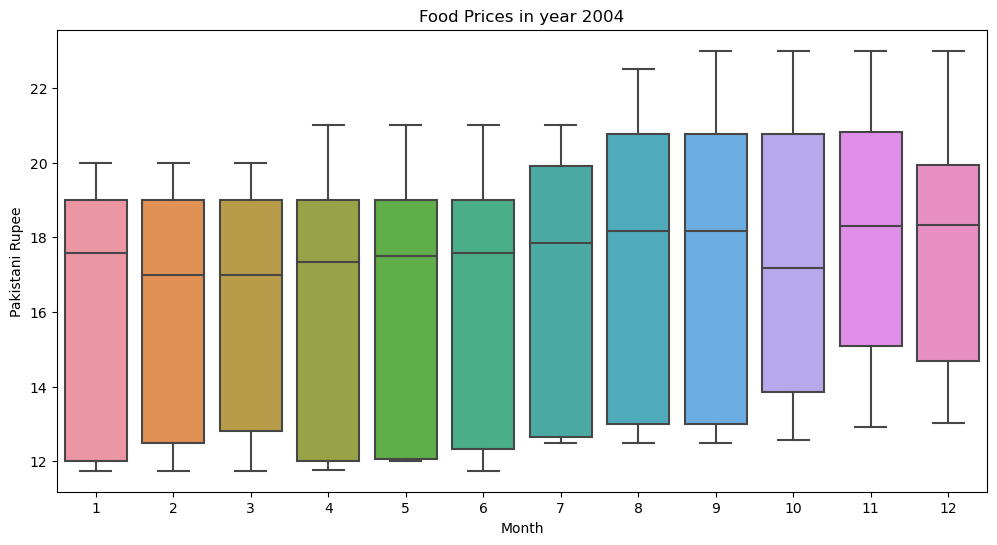

In [55]:
df_last_two = df[df.index.year == 2004]
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
sns.boxplot(data = df_last_two, x=df_last_two.index.month, y='Price', ax=ax)
ax.set_ylabel("Pakistani Rupee")
ax.set_title('Food Prices in year 2004')
ax.set_xlabel('Month');

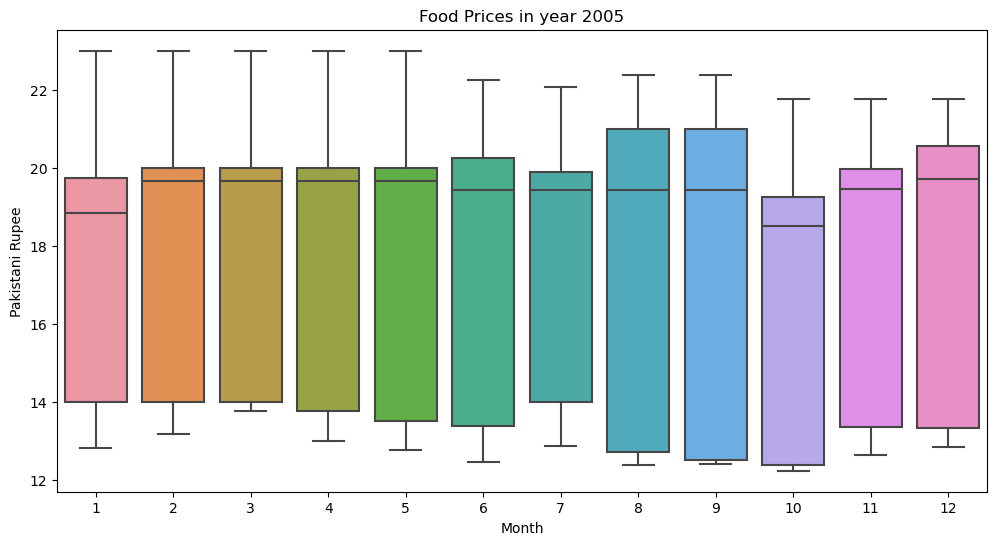

In [57]:
df_last_two = df[df.index.year == 2005]
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
sns.boxplot(data = df_last_two, x=df_last_two.index.month, y='Price', ax=ax)
ax.set_ylabel("Pakistani Rupee")
ax.set_title('Food Prices in year 2005')
ax.set_xlabel('Month');

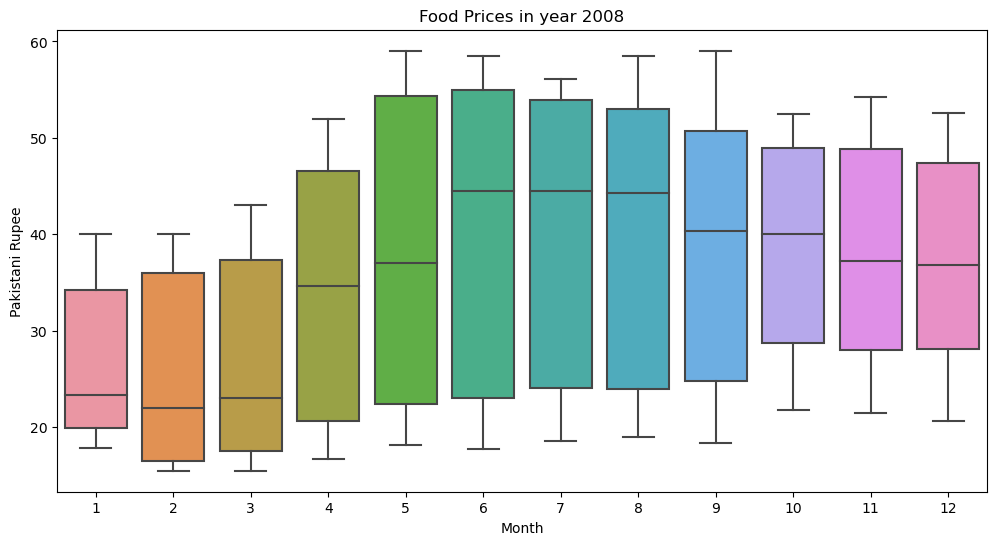

In [58]:
df_last_two = df[df.index.year == 2008]
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
sns.boxplot(data = df_last_two, x=df_last_two.index.month, y='Price', ax=ax)
ax.set_ylabel("Pakistani Rupee")
ax.set_title('Food Prices in year 2008')
ax.set_xlabel('Month');

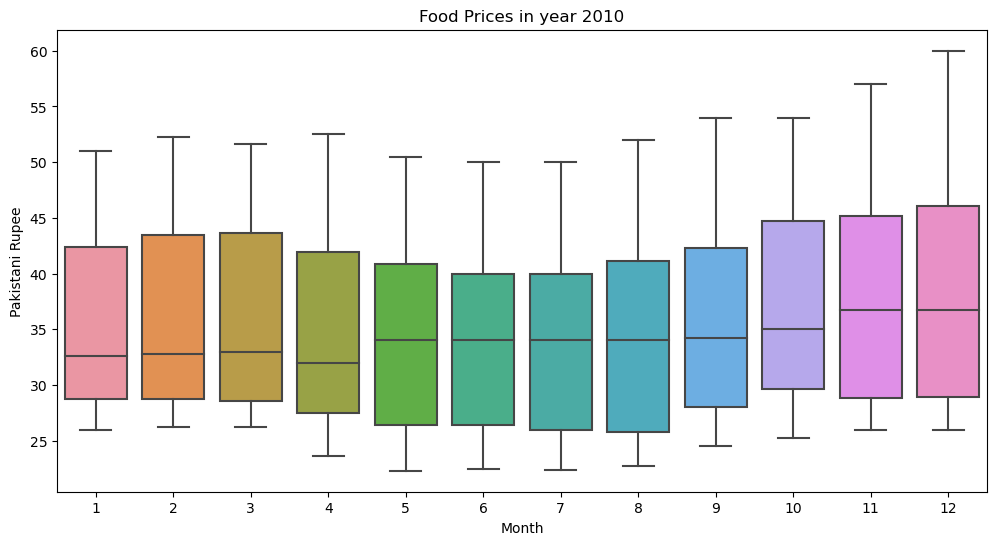

In [62]:
df_last_two = df[df.index.year == 2010]
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
sns.boxplot(data = df_last_two, x=df_last_two.index.month, y='Price', ax=ax)
ax.set_ylabel("Pakistani Rupee")
ax.set_title('Food Prices in year 2010')
ax.set_xlabel('Month');

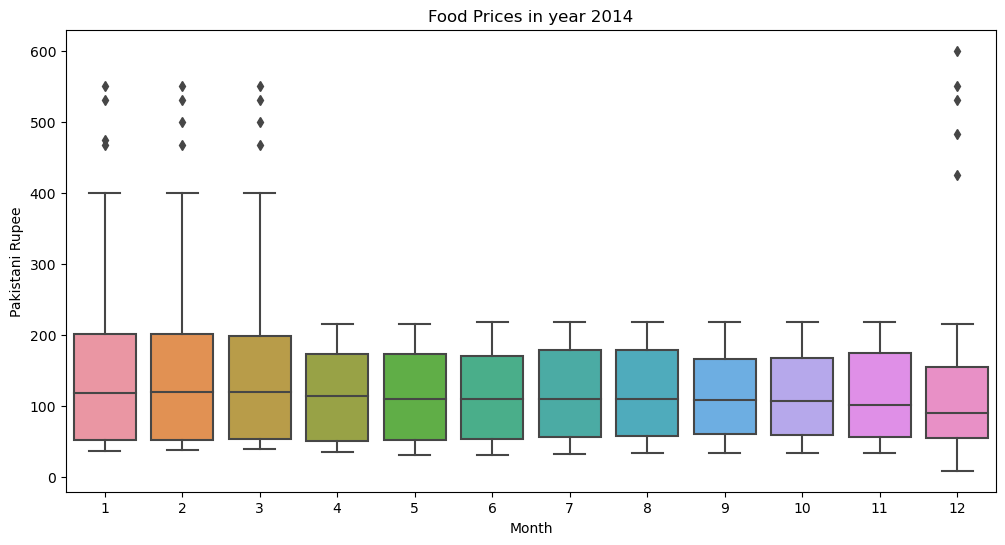

In [63]:
df_last_two = df[df.index.year == 2014]
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
sns.boxplot(data = df_last_two, x=df_last_two.index.month, y='Price', ax=ax)
ax.set_ylabel("Pakistani Rupee")
ax.set_title('Food Prices in year 2014')
ax.set_xlabel('Month');

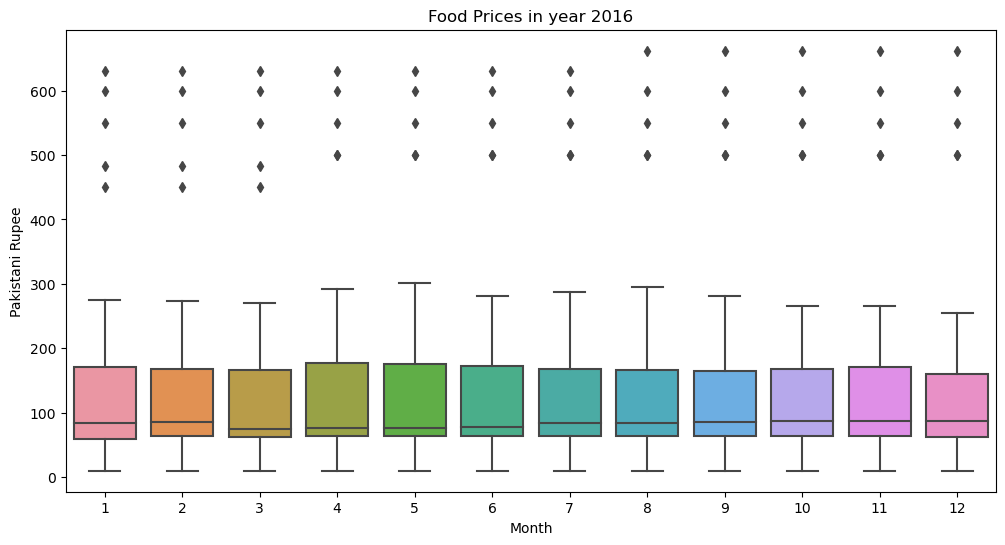

In [64]:
df_last_two = df[df.index.year == 2016]
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
sns.boxplot(data = df_last_two, x=df_last_two.index.month, y='Price', ax=ax)
ax.set_ylabel("Pakistani Rupee")
ax.set_title('Food Prices in year 2016')
ax.set_xlabel('Month');

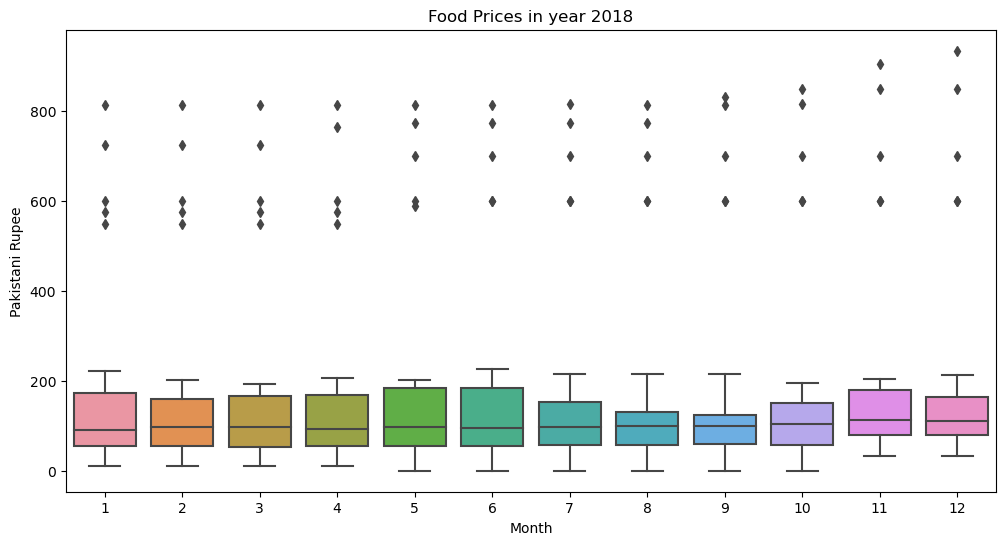

In [65]:
df_last_two = df[df.index.year == 2018]
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
sns.boxplot(data = df_last_two, x=df_last_two.index.month, y='Price', ax=ax)
ax.set_ylabel("Pakistani Rupee")
ax.set_title('Food Prices in year 2018')
ax.set_xlabel('Month');

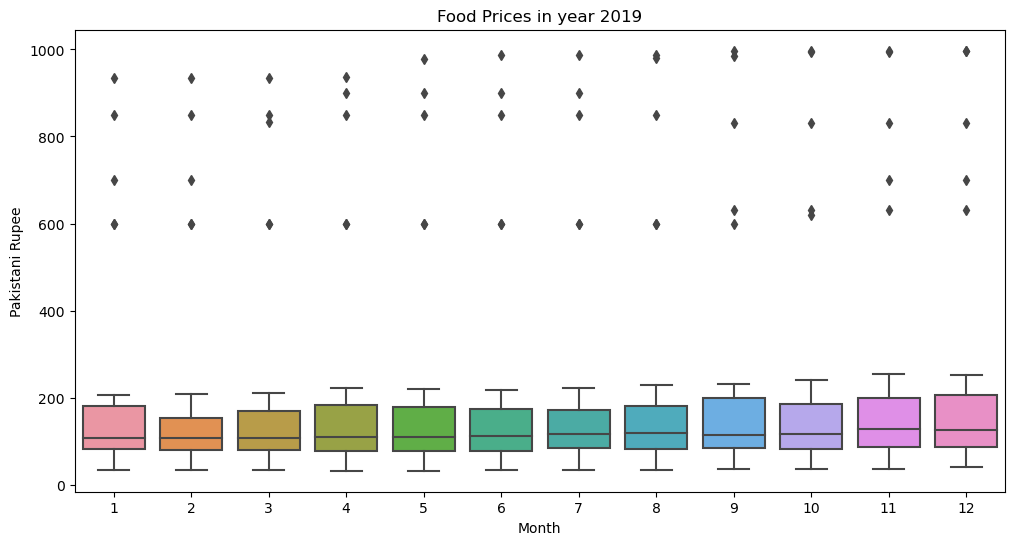

In [67]:
df_last_two = df[df.index.year == 2019]
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
sns.boxplot(data = df_last_two, x=df_last_two.index.month, y='Price', ax=ax)
ax.set_ylabel("Pakistani Rupee")
ax.set_title('Food Prices in year 2019')
ax.set_xlabel('Month');

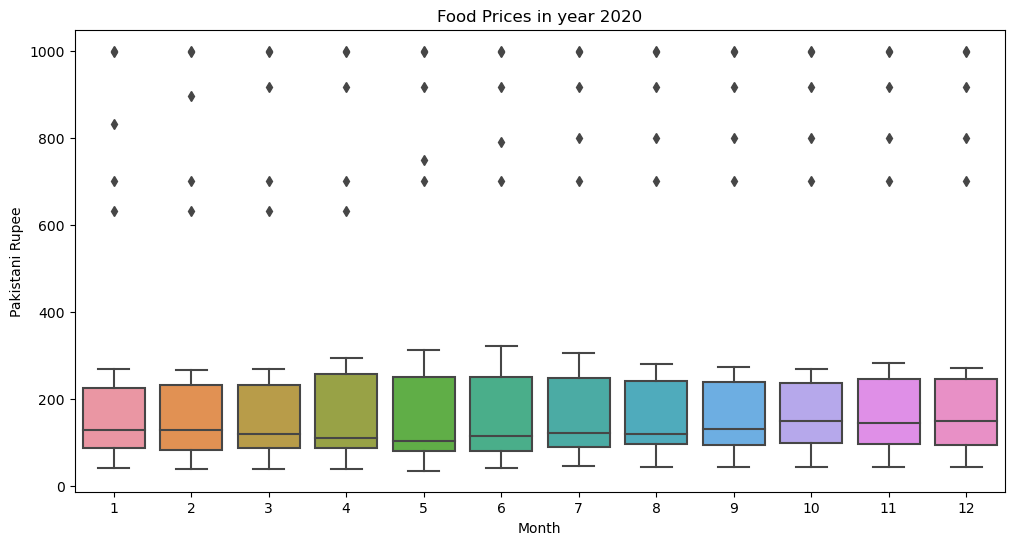

In [69]:
df_last_two = df[df.index.year == 2020]
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
sns.boxplot(data = df_last_two, x=df_last_two.index.month, y='Price', ax=ax)
ax.set_ylabel("Pakistani Rupee")
ax.set_title('Food Prices in year 2020')
ax.set_xlabel('Month');

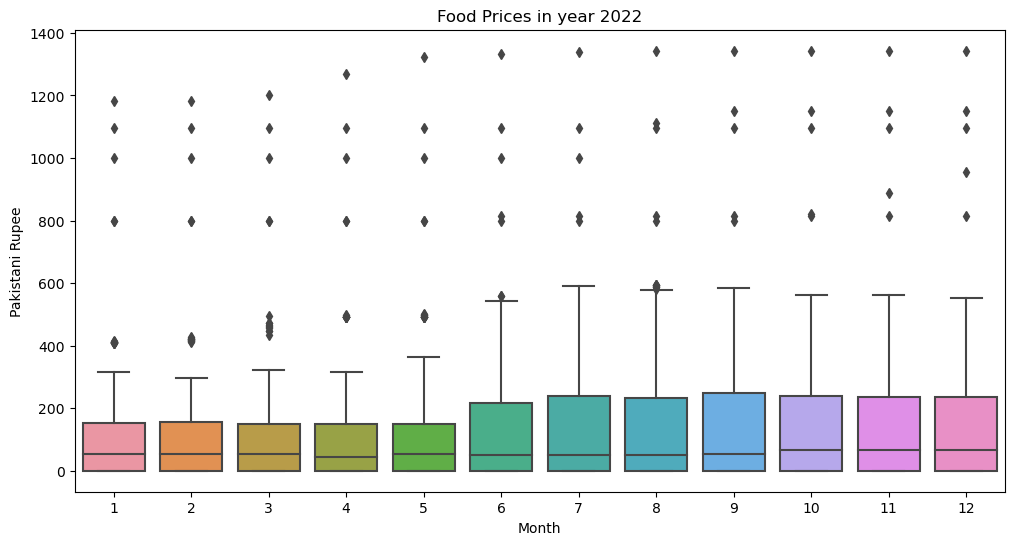

In [70]:
df_last_two = df[df.index.year == 2022]
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
sns.boxplot(data = df_last_two, x=df_last_two.index.month, y='Price', ax=ax)
ax.set_ylabel("Pakistani Rupee")
ax.set_title('Food Prices in year 2022')
ax.set_xlabel('Month');

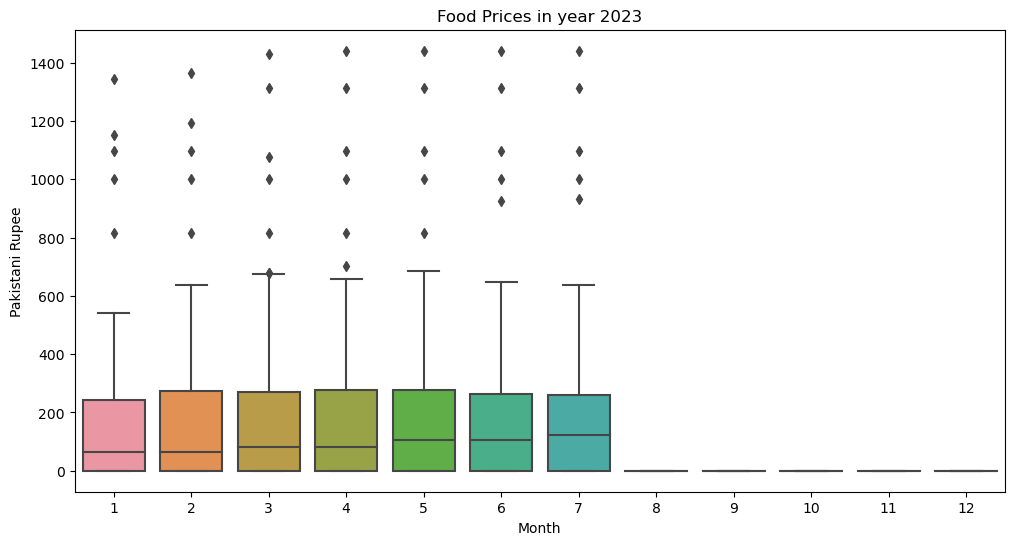

In [71]:
df_last_two = df[df.index.year == 2023]
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
sns.boxplot(data = df_last_two, x=df_last_two.index.month, y='Price', ax=ax)
ax.set_ylabel("Pakistani Rupee")
ax.set_title('Food Prices in year 2023')
ax.set_xlabel('Month');

##### Food Prices in $ (2004-2023)

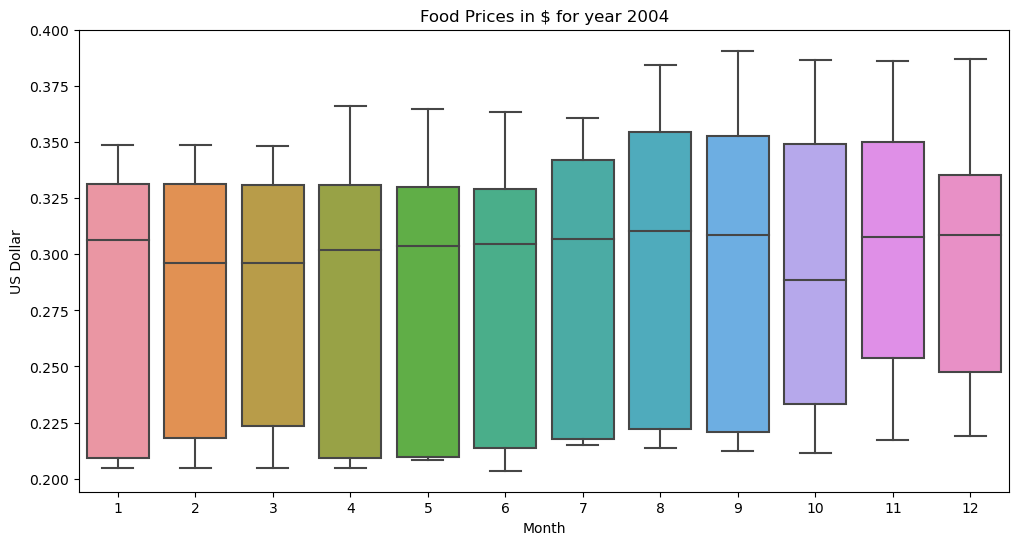

In [79]:
df_last_two = df[df.index.year == 2004]
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
sns.boxplot(data = df_last_two, x=df_last_two.index.month, y='$Price', ax=ax)
ax.set_ylabel("US Dollar")
ax.set_title('Food Prices in $ for year 2004')
ax.set_xlabel('Month');

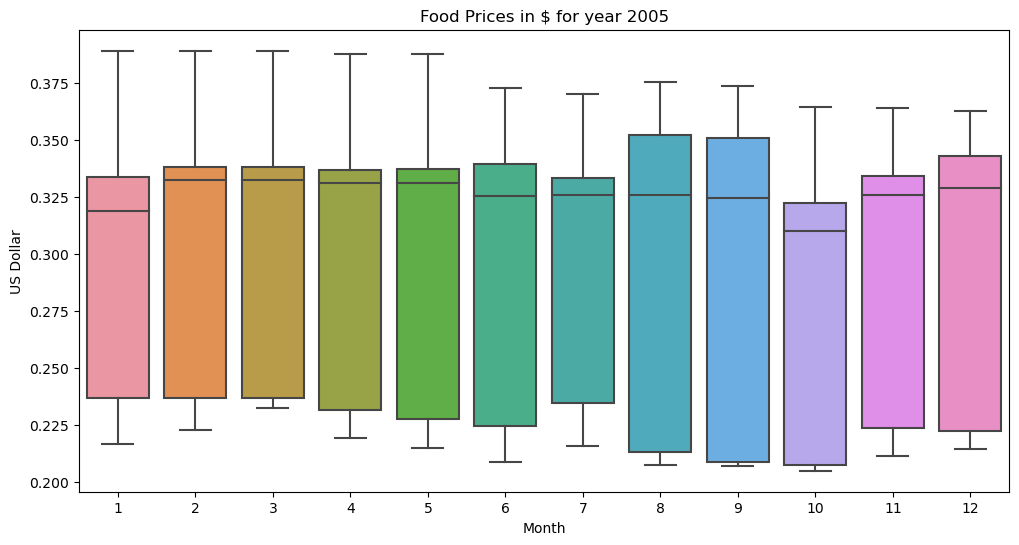

In [80]:
df_last_two = df[df.index.year == 2005]
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
sns.boxplot(data = df_last_two, x=df_last_two.index.month, y='$Price', ax=ax)
ax.set_ylabel("US Dollar")
ax.set_title('Food Prices in $ for year 2005')
ax.set_xlabel('Month');

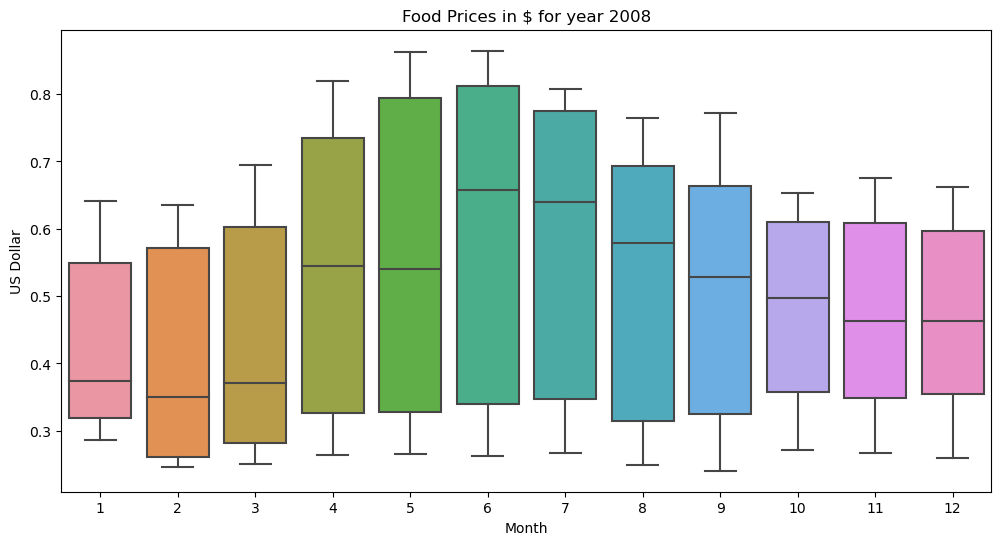

In [81]:
df_last_two = df[df.index.year == 2008]
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
sns.boxplot(data = df_last_two, x=df_last_two.index.month, y='$Price', ax=ax)
ax.set_ylabel("US Dollar")
ax.set_title('Food Prices in $ for year 2008')
ax.set_xlabel('Month');

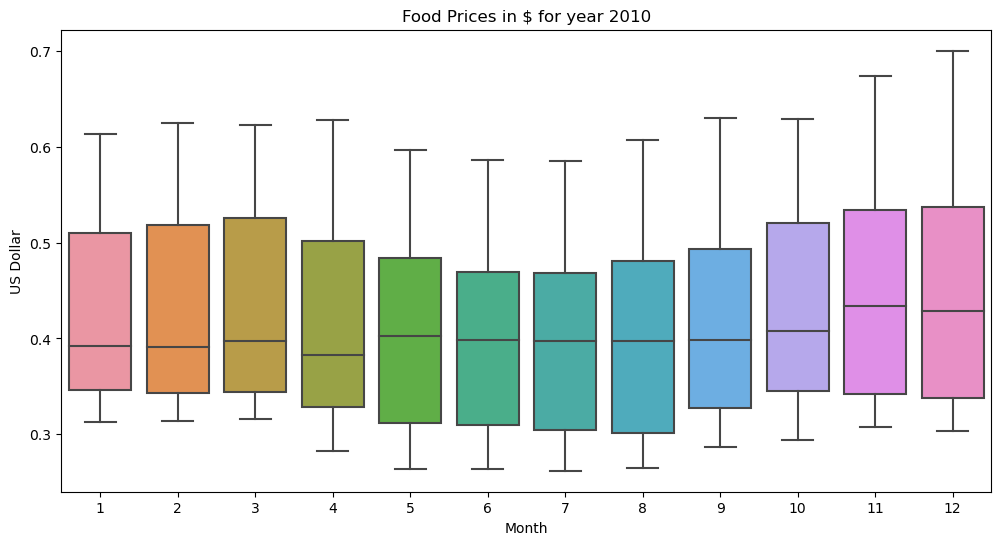

In [82]:
df_last_two = df[df.index.year == 2010]
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
sns.boxplot(data = df_last_two, x=df_last_two.index.month, y='$Price', ax=ax)
ax.set_ylabel("US Dollar")
ax.set_title('Food Prices in $ for year 2010')
ax.set_xlabel('Month');

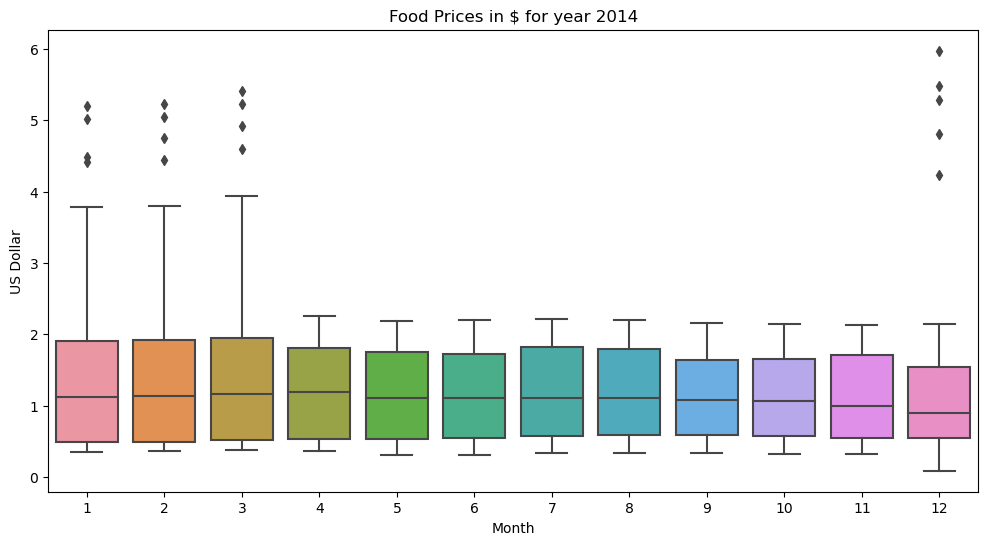

In [83]:
df_last_two = df[df.index.year == 2014]
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
sns.boxplot(data = df_last_two, x=df_last_two.index.month, y='$Price', ax=ax)
ax.set_ylabel("US Dollar")
ax.set_title('Food Prices in $ for year 2014')
ax.set_xlabel('Month');

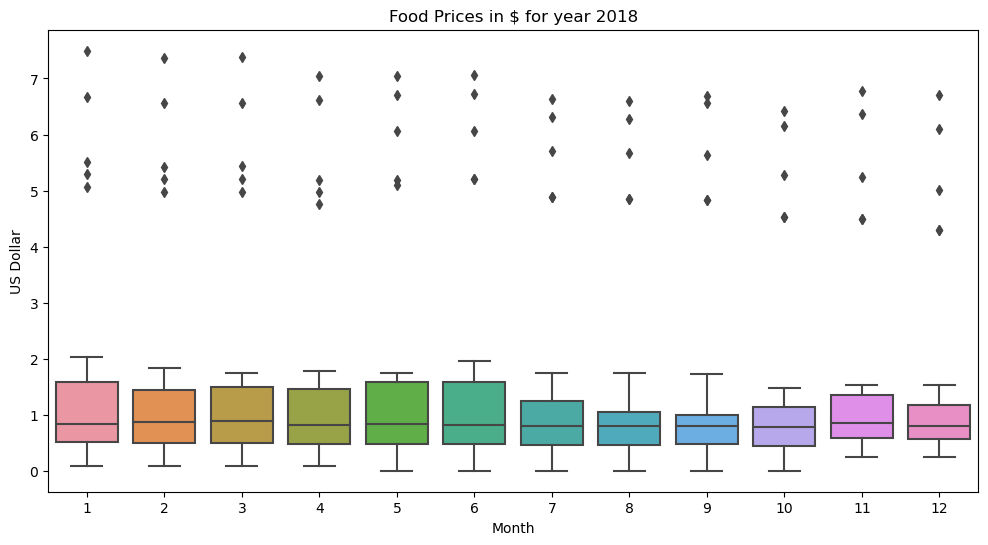

In [84]:
df_last_two = df[df.index.year == 2018]
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
sns.boxplot(data = df_last_two, x=df_last_two.index.month, y='$Price', ax=ax)
ax.set_ylabel("US Dollar")
ax.set_title('Food Prices in $ for year 2018')
ax.set_xlabel('Month');

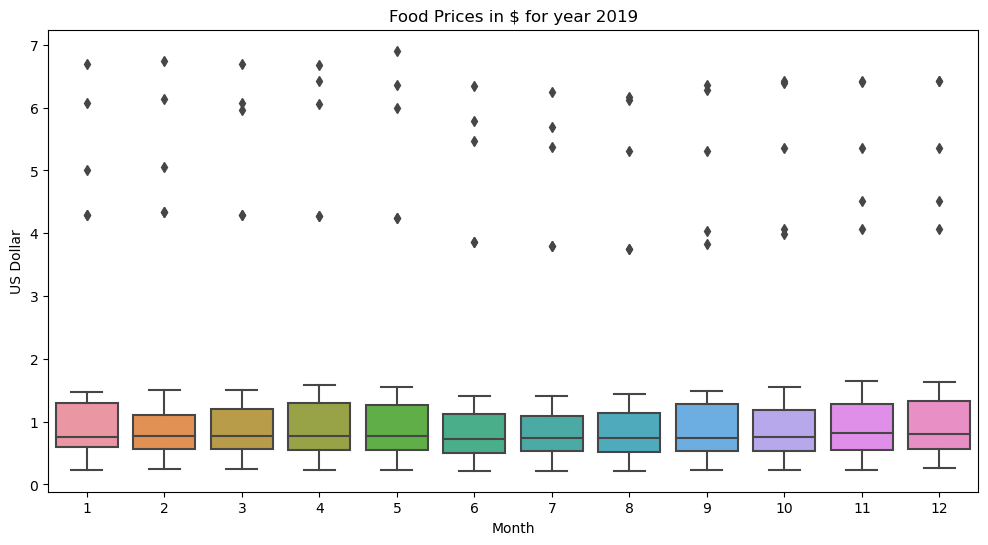

In [85]:
df_last_two = df[df.index.year == 2019]
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
sns.boxplot(data = df_last_two, x=df_last_two.index.month, y='$Price', ax=ax)
ax.set_ylabel("US Dollar")
ax.set_title('Food Prices in $ for year 2019')
ax.set_xlabel('Month');

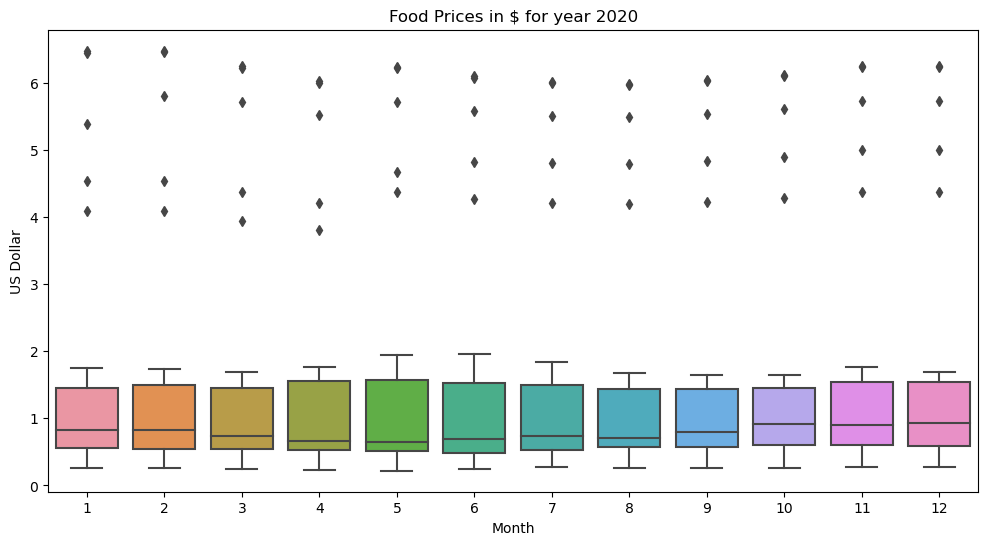

In [86]:
df_last_two = df[df.index.year == 2020]
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
sns.boxplot(data = df_last_two, x=df_last_two.index.month, y='$Price', ax=ax)
ax.set_ylabel("US Dollar")
ax.set_title('Food Prices in $ for year 2020')
ax.set_xlabel('Month');

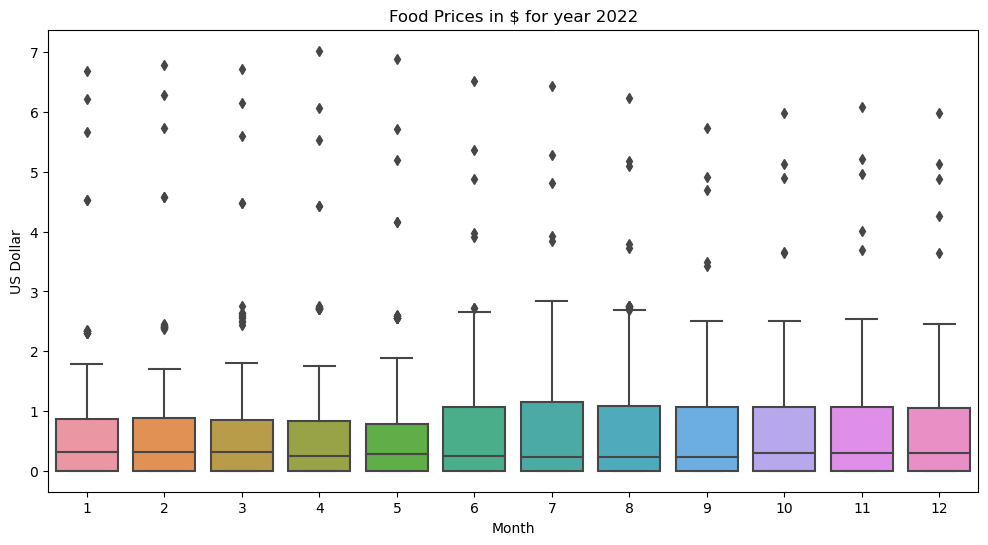

In [87]:
df_last_two = df[df.index.year == 2022]
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
sns.boxplot(data = df_last_two, x=df_last_two.index.month, y='$Price', ax=ax)
ax.set_ylabel("US Dollar")
ax.set_title('Food Prices in $ for year 2022')
ax.set_xlabel('Month');

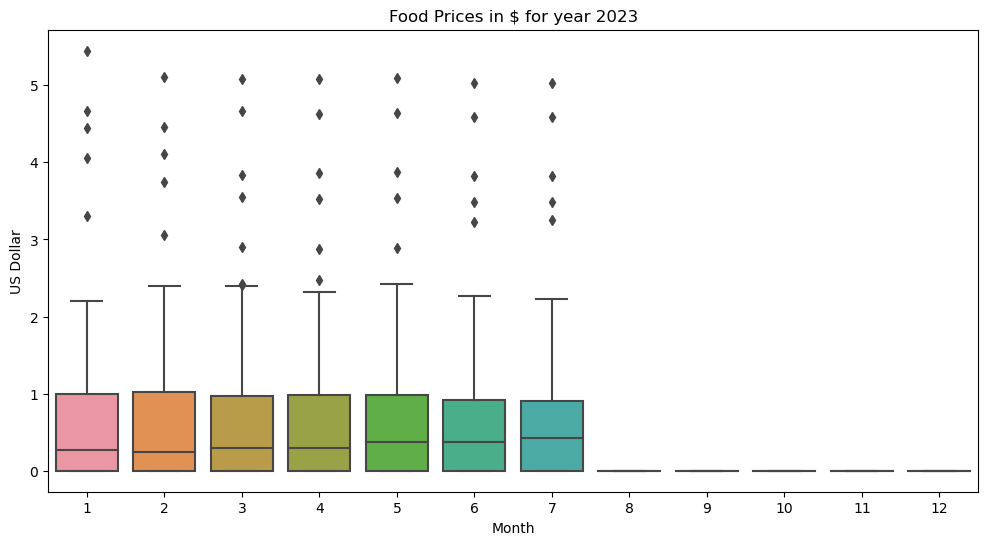

In [88]:
df_last_two = df[df.index.year == 2023]
fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
sns.boxplot(data = df_last_two, x=df_last_two.index.month, y='$Price', ax=ax)
ax.set_ylabel("US Dollar")
ax.set_title('Food Prices in $ for year 2023')
ax.set_xlabel('Month');

In [89]:
# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score
df.columns

Index(['Province', 'City', 'Market', 'Latitude', 'Longitude', 'Category',
       'Commodity', 'Unit', 'Priceflag', 'Pricetype', 'Currency', 'Price',
       '$Price'],
      dtype='object')

In [90]:
# label encodding
# Converting categorical values into unique integer values
from sklearn.preprocessing import LabelEncoder
cols = ['Province', 'City', 'Market', 'Latitude', 'Longitude', 'Category',
       'Commodity', 'Unit', 'Priceflag', 'Pricetype', 'Currency']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [91]:
df.head()

Province  City  Market  Latitude  Longitude  Category  Commodity  \
Date                                                                           
2004-01-15         0     4       4         1          0         0         10   
2004-01-15         1     3       3         4          3         0         10   
2004-01-15         1     3       3         4          3         0         16   
2004-01-15         2     1       1         3          4         0         10   
2004-01-15         2     1       1         3          4         0         16   

            Unit  Priceflag  Pricetype  Currency  Price  $Price  
Date                                                             
2004-01-15     2          0          0         0  20.00  0.3487  
2004-01-15     2          0          0         0  17.59  0.3066  
2004-01-15     2          0          0         0  12.00  0.2092  
2004-01-15     2          0          0         0  19.15  0.3339  
2004-01-15     2          0          0         0  11.75  0.2049

In [92]:
#  splitting data into test and train set
from sklearn.model_selection import train_test_split
x = df[['Province', 'City', 'Market', 'Latitude', 'Longitude', 'Category',
       'Commodity', 'Unit', 'Priceflag', 'Pricetype', 'Currency',
       '$Price']]
y = df['Price']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

Train Set Accuracy:84.65841852718047
Test Set Accuracy:85.38976711870984


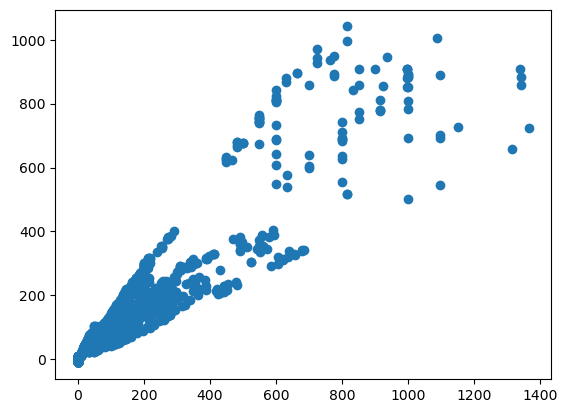

In [93]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)
y_pred = lin_reg.predict(x_test)

lin_acc=r2_score(y_test,lin_reg.predict(x_test))

print("Train Set Accuracy:"+str(r2_score(y_train,lin_reg.predict(x_train))*100))
print("Test Set Accuracy:"+str(r2_score(y_test,lin_reg.predict(x_test))*100))

plt.scatter(y_test,y_pred)
plt.show()

Train Set Accuracy:99.95820541111179
Test Set Accuracy:86.92493470958334


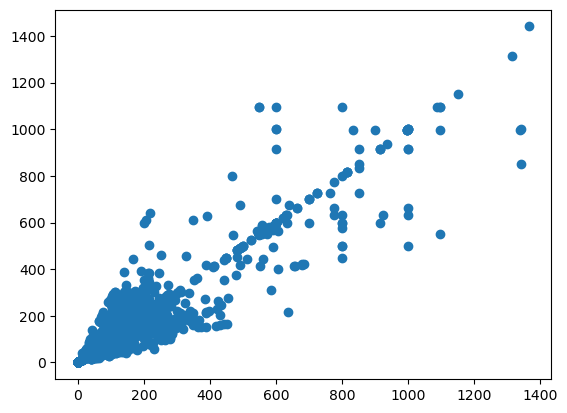

In [94]:
d_reg = DecisionTreeRegressor()
d_reg.fit(x_train,y_train)
y_pred = d_reg.predict(x_test)

d_acc=r2_score(y_test,d_reg.predict(x_test))

print("Train Set Accuracy:"+str(r2_score(y_train,d_reg.predict(x_train))*100))
print("Test Set Accuracy:"+str(r2_score(y_test,d_reg.predict(x_test))*100))

plt.scatter(y_test,y_pred)
plt.show()

Train Set Accuracy:98.52249747794262
Test Set Accuracy:91.78165399683326


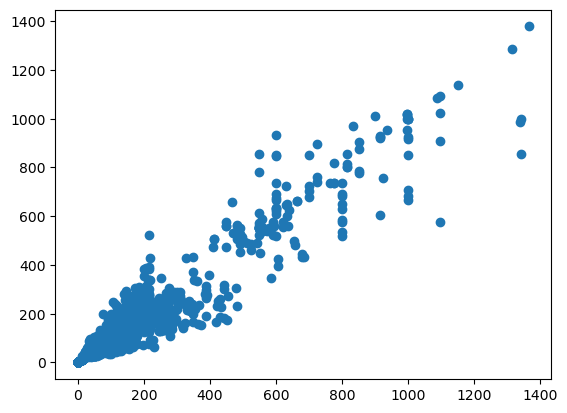

In [95]:
r_reg = RandomForestRegressor()
r_reg.fit(x_train,y_train)
y_pred = r_reg.predict(x_test)

r_acc=r2_score(y_test,r_reg.predict(x_test))

print("Train Set Accuracy:"+str(r2_score(y_train,r_reg.predict(x_train))*100))
print("Test Set Accuracy:"+str(r2_score(y_test,r_reg.predict(x_test))*100))

plt.scatter(y_test,y_pred)
plt.show()

Train Set Accuracy:93.0808987540735
Test Set Accuracy:91.35708748359328


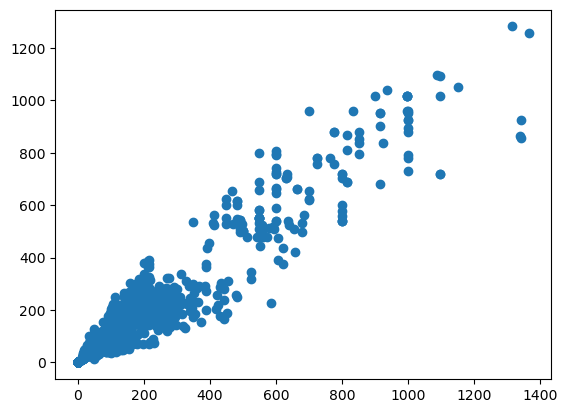

In [96]:
k_reg = KNeighborsRegressor()
k_reg.fit(x_train,y_train)
y_pred = k_reg.predict(x_test)

k_acc=r2_score(y_test,k_reg.predict(x_test))

print("Train Set Accuracy:"+str(r2_score(y_train,k_reg.predict(x_train))*100))
print("Test Set Accuracy:"+str(r2_score(y_test,k_reg.predict(x_test))*100))

plt.scatter(y_test,y_pred)
plt.show()

Train Set Accuracy:52.129203001985466
Test Set Accuracy:52.18580409847677


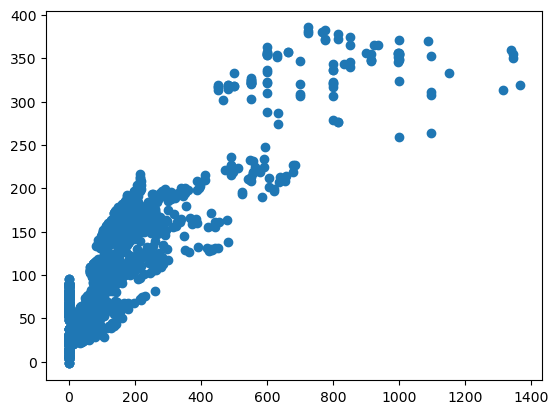

In [97]:
s_reg = SVR()
s_reg.fit(x_train,y_train)
y_pred = s_reg.predict(x_test)

s_acc=r2_score(y_test,s_reg.predict(x_test))

print("Train Set Accuracy:"+str(r2_score(y_train,s_reg.predict(x_train))*100))
print("Test Set Accuracy:"+str(r2_score(y_test,s_reg.predict(x_test))*100))

plt.scatter(y_test,y_pred)
plt.show()

In [100]:
models = pd.DataFrame({
    'Model': ['Linear regression','Decision tree regression','RandomForestRegressor','KNeighborsRegressor','SVR'],
    'Score': [ lin_acc,d_acc, r_acc, k_acc, s_acc]
})

# sorting values in descending order
models.sort_values(by = 'Score', ascending = False)

Model     Score
2     RandomForestRegressor  0.917817
3       KNeighborsRegressor  0.913571
1  Decision tree regression  0.869249
0         Linear regression  0.853898
4                       SVR  0.521858

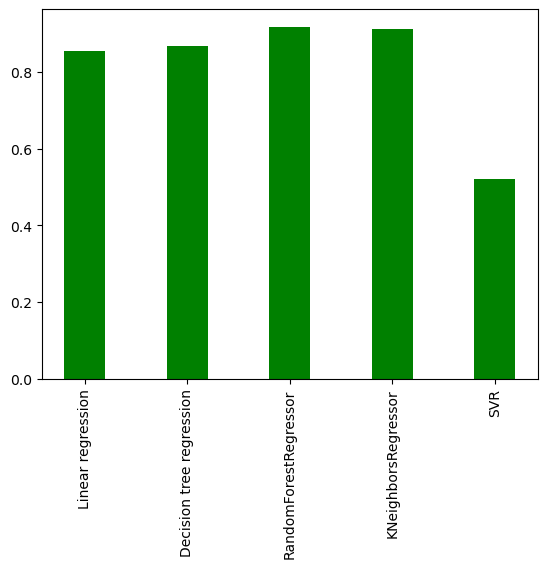

In [101]:
plt.bar(models.Model, models.Score,width = 0.4, color = 'green')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from IPython.display import display
import ipywidgets as widgets

# Define global variables
food_items = ['Rice (basmati, broken)', 'Wheat flour', 'Sugar', 'Milk', 'Wheat', 'Beans', 'Fish', 'Maize']


# Load and preprocess data
df = pd.read_csv('wfp_food_prices_pak.csv', header=1)
df['date'] = pd.to_datetime(df['#date'])
df['price'] = pd.to_numeric(df['#value'], errors='coerce')

# Define functions for each part
def part1():
    # Part 1: Find the general trend in food prices over time
    # Selecting specific food items for analysis
#     df_part1 = df[df['#item+name'].isin(food_items)]
#     food_items = ['Rice (basmati, broken)', 'Wheat flour', 'Sugar', 'Milk', 'Wheat', 'Beans', 'Fish', 'Maize']
    df_part1 = df[df['#item+name'].isin(food_items)]

    # Aggregate prices per month
    monthly_prices = df_part1.groupby(pd.Grouper(key='date', freq='M'))['price'].mean().reset_index()

    # Apply Linear Regression to identify trends
    X = monthly_prices.index.values.reshape(-1, 1)
    y = monthly_prices['price']
    model = LinearRegression()
    model.fit(X, y)
    trend = model.predict(X)

    # Visualize the trend
    plt.figure(figsize=(12, 6))
    plt.scatter(monthly_prices['date'], monthly_prices['price'], color='lightblue', label='Monthly Average Prices')
    plt.plot(monthly_prices['date'], trend, color='red', label='Trend')
    plt.title('General Trend in Food Prices Over Time')
    plt.xlabel('Date')
    plt.ylabel('Average Price')
    plt.legend()
    plt.show()

    # Decompose time series to observe seasonal patterns
    decomposed = sm.tsa.seasonal_decompose(monthly_prices['price'], model='additive', period=12)
    decomposed.plot()
    plt.show()

def part2():
    # Part 2: Analyse the significant relationship between different food prices
    food_items = ['Rice (basmati, broken)', 'Wheat flour', 'Sugar', 'Milk', 'Wheat', 'Beans', 'Fish', 'Maize']
    df_part1 = df[df['#item+name'].isin(food_items)]
    df_part1 = df[df['#item+name'].isin(food_items)]

    pivot_df = df_part1.pivot_table(values='price', index='date', columns='#item+name')
    pivot_df.dropna(inplace=True)

    # Using a Decision Tree to understand feature importance
    target = 'Wheat flour'
    features = pivot_df.columns.drop(target)
    X = pivot_df[features]
    y = pivot_df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_model.fit(X_train, y_train)

    # Evaluate and visualize feature importances
    y_pred = tree_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    plt.figure(figsize=(10, 6))
    plt.barh(features, tree_model.feature_importances_)
    plt.xlabel('Feature Importance')
    plt.ylabel('Food Items')
    plt.title('Feature Importances in Predicting Wheat Flour Prices')
    plt.show()

def part3():
    # Part 3: Analyse the impact of increased oil prices on the prices of other food items
    # Function to analyze the impact of diesel prices on food items
    # food_items_one = ['Wheat flour', 'Rice (basmati, broken)', 'Sugar', 'Milk']
    def analyze_impact_of_diesel_on_food(food_item):
        # Filter and rename columns for diesel data
        diesel_df = df[df['#item+name'] == 'Fuel (diesel)'][['date', 'price']].dropna()
        diesel_df.rename(columns={'price': 'price_diesel'}, inplace=True)

        # Filter and rename columns for the specified food item
        food_df = df[df['#item+name'] == food_item][['date', 'price']].dropna()
        food_df.rename(columns={'price': f'price_{food_item.replace(" ", "_")}'}, inplace=True)

        # Merge the two dataframes on the 'date' column
        merged_df = pd.merge(diesel_df, food_df, on='date')

        # Prepare data for linear regression
        X = merged_df[['price_diesel']]
        y = merged_df[f'price_{food_item.replace(" ", "_")}']

        # Perform linear regression
        model = LinearRegression()
        model.fit(X, y)

        # Plot the results
        plt.figure(figsize=(10, 6))
        plt.scatter(X, y, color='blue')
        plt.plot(X, model.predict(X), color='red')
        plt.title(f'Impact of Diesel Prices on {food_item} Prices')
        plt.xlabel('Diesel Prices')
        plt.ylabel(f'{food_item} Prices')
        plt.show()

    # Example usage
    for food_item in ['Wheat flour', 'Rice (basmati, broken)', 'Sugar', 'Milk']:
        analyze_impact_of_diesel_on_food(food_item)

def part4():
    # Part 4: Compare all provinces data over time and find general trends
    # Prepare data for K-Means Clustering
    df_part4 = df[df['#item+name'].isin(food_items)]
    pivot_df = df_part4.pivot_table(values='price', index='date', columns='#adm1+name', aggfunc='mean')
    pivot_df.fillna(method='ffill', inplace=True)

    # Determine number of provinces and apply clustering
    num_provinces = pivot_df.shape[1]
    n_clusters = min(num_provinces, 5)
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(pivot_df.T)
    province_cluster_map = {province: f'Cluster {cluster}' for province, cluster in zip(pivot_df.columns, clusters)}
    df_part4 = df[df['#item+name'].isin(food_items)].copy()
    df_part4['cluster'] = df_part4['#adm1+name'].map(province_cluster_map)

    # Pivot data for visualization and plot
    pivot_df_for_plot = df_part4.pivot_table(values='price', index='date', columns=['#adm1+name', 'cluster'], aggfunc='mean')
    plt.figure(figsize=(15, 8))
    for column in pivot_df_for_plot.columns:
        province, cluster = column
        sns.lineplot(data=pivot_df_for_plot[column], label=f'{province} ({cluster})')
    plt.title('Food Price Trends by Province and Cluster')
    plt.xlabel('Date')
    plt.ylabel('Average Price')
    plt.legend(title='Province (Cluster)', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

output = widgets.Output()

# Create buttons with styling
button1 = widgets.Button(description="General Trend", button_style='info')
button2 = widgets.Button(description="Significant Relationship", button_style='success')
button3 = widgets.Button(description="Increased Oil Prices", button_style='warning')
button4 = widgets.Button(description="Provinces Data", button_style='danger')

# Define button click event handlers
def on_button1_clicked(b):
    with output:
        output.clear_output()
        part1()

def on_button2_clicked(b):
    with output:
        output.clear_output()
        part2()

def on_button3_clicked(b):
    with output:
        output.clear_output()
        part3()

def on_button4_clicked(b):
    with output:
        output.clear_output()
        part4()

# Link buttons to event handlers
button1.on_click(on_button1_clicked)
button2.on_click(on_button2_clicked)
button3.on_click(on_button3_clicked)
button4.on_click(on_button4_clicked)

# Arrange buttons horizontally
hbox_buttons = widgets.HBox([button1, button2, button3, button4])

# Display the buttons and output
display(hbox_buttons)
display(output)